#Initiate

##Requirements 

In [1]:
# install the following libraries 
# !pip install stable-baselines==2.10.2
# !pip install pymoo==0.4.2.2
# # !pip install pycaret
# # !pip install tensorflow==1.14
# # %tensorflow_version 1.x
# !pip install importlib-metadata==4.13.0
# !pip install tensorflow==1.15.2
# !pip install gym==0.21.0

import tensorflow as tf
import gym
import numpy as np
from stable_baselines import DQN
from copy import deepcopy
import math
from gym.spaces import Discrete, Dict, Box
from gym import spaces
from random import seed
import random 
from gym import Env
from datetime import datetime
import sys
import time
import pickle
import stable_baselines
import sklearn
import numpy
from sklearn import tree , svm 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.utils import resample
from sklearn.model_selection import KFold , RepeatedKFold
from sklearn.metrics import f1_score
from sklearn import impute
import statistics
from scipy import stats
from copy import deepcopy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from math import ceil
import copy
import sys
from sklearn.metrics import jaccard_score
import time
import multiprocessing
from pymoo.algorithms.nsga2 import calc_crowding_distance
sys.path.append('lib/')
import subprocess
import logging
from sklearn.utils import shuffle
import csv
from csv import reader
import os


c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
!pip install ipython-autotime

%load_ext autotime

##RL

In [16]:

class StoreAndTerminateWrapper(gym.Wrapper):
  ''''
  :param env: (gym.Env) Gym environment that will be wrapped
  :param max_steps: (int) Max number of steps per episode
  '''
  def __init__(self, env):
    # Call the parent constructor, so we can access self.env later
    super(StoreAndTerminateWrapper, self).__init__(env)
    self.max_steps = 200
    # Counter of steps per episode
    self.current_step = 0
    self.mem = []
    self.TotalReward = 0.0 
    self.env = env
    self.first_state = 0
    self.first_obs = 0
    self.prev_obs = 0 
    self.states_list = []
    self.info = {}
  
  def reset(self):
    """
    Reset the environment 
    """
    # Reset the counter
    self.current_step = 0
    obs =self.env.reset()
    self.TotalReward = 0.0
    self.first_obs = obs
    return obs

  def step(self, action):
    """
    In this function we store the initial state as well as the memory of the agent
    :param action: ([float] or int) Action taken by the agent
    :return: (np.ndarray, float, bool, dict) observation, reward, is the episode over?, additional informations
    """
    if self.current_step == 0: #store initial state
      self.prev_obs = self.first_obs
      self.first_state = deepcopy(self.env)
      self.states_list.append(self.first_state)
    # print("t",self.env.state[0],"reward",self.TotalReward)
    # if self.env.state[0]==-1.2:
    #   print("-1.2")
    #   obs = self.reset()
    #   reward = -200
    #   done = True
    #   return obs, reward, done, False
    self.current_step += 1
    obs, reward, done, info = self.env.step(action)
    self.TotalReward += reward
    self.mem.append(tuple((self.prev_obs,action)))
    self.prev_obs = obs
    if self.current_step >= self.max_steps:
      done = True
      # Update the info dict to signal that the limit was exceeded
    if obs[0]<=-1.2:
      done = True
      reward = -201 - self.TotalReward
      self.TotalReward =-200
      # print("fff",reward)
    if done:
      self.mem.append(tuple(('done',self.TotalReward)))
    self.info['mem'] = self.mem
    self.info['state'] = self.states_list
    # self.mem.append(tuple(obs,action))
    return obs, reward, done, info

  def set_state(self, state):
    """
    :param state: initial state of the episode
    :return: environment is updated and observations is returned
    """
    self.env = deepcopy(state)
    obs = np.array(list(self.env.unwrapped.state))
    self.current_step = 0
    self.TotalReward = 0.0
    self.first_obs = obs
    return obs

def proportional_sampling_whitout_replacement(index , size):
  s=0
  s = sum(np.array(index))
  p = [ind/s for ind in index]
  samples = np.random.choice(index,size=size,replace=False,p=p)
  return samples


def population_sample(episodes , ind,  pop_size , threshold, functional_fault_size, reward_fault_size):
  """
  This function is meant to sample episodes from training after that you need to add test episodes using random_test 
  Set the parameters as you want but be careful the input episodes for this function is the memory of the agent and each step has seperate index 
  this function returns the final steps of the selected function then you need to extract that episodes from the input memore that is called 'episodes'
  use the episodes extract function ... 

  samples n episodes from training n1 functinal faults and n2 reward faults 
  reward faults are episodes with reward bellow the thresthreshold 
  from random test samples M episodes m1 random episode and
  m2 episodes with sudden reward change we dont have a sudden reward change in this example  
  """
  epsilon = 0.1
  index = []
  functional_fault = []
  reward_fault = []
  start_states =[]
  ind  = np.where(np.array(episodes)==('done',))
  index= ind[0]
  print(len(ind[0]),'episodes from training')
  population=[]
  for i in index:
    _,r = episodes[i]
    if abs(episodes[i-1][0][0])<(mtc_wrapped.low[0]+epsilon):
      functional_fault.append(i)
      print('function fault') 
    if r<threshold:
      reward_fault.append(i)
      print('reward fault')
  if len(functional_fault)<functional_fault_size:
    print('functional faults size is' ,len(functional_fault),' and its less than desired number' )
    population += functional_fault
    print('sampling more random episodes instead ...!')
  if len(functional_fault)==functional_fault_size:
    population += functional_fault
  if len(functional_fault)>functional_fault_size:
    # proportianl_sample_whitout_replacement()
    sam1=proportional_sampling_whitout_replacement(functional_fault,functional_fault_size)
    print(population)
    print("ff",len(functional_fault))
    population += sam1
  if len(reward_fault)<reward_fault_size:
    print('reward faults size is' ,len(reward_fault),' and its less than desired number' )
    population += reward_fault
    print('sampling more random episodes instead ...!')
  if len(reward_fault)==reward_fault_size:
    population += reward_fault
  if len(reward_fault)>reward_fault_size:
    #proportional sampling
    sam2 = proportional_sampling_whitout_replacement(reward_fault,reward_fault_size)
    population += list(sam2)
  r_size= pop_size-len(population)
  # random_test(model,env,r_size)
  print("RF",len(reward_fault))
  # population += reward_fault
  return population , r_size


def population_sample_generalaized(episodes ,  pop_size , threshold, functional_fault_size, reward_fault_size):
  """
  This function is meant to sample episodes from training after that you need to add test episodes using random_test 
  Set the parameters as you want but be careful the input episodes for this function is the memory of the agent and each step has seperate index 
  this function returns the final steps of the selected function then you need to extract that episodes from the input memore that is called 'episodes'
  use the episodes extract function ... 

  samples n episodes from training n1 functinal faults and n2 reward faults 
  reward faults are episodes with reward bellow the thresthreshold 
  from random test samples M episodes m1 random episode and
  m2 episodes with sudden reward change we dont have a sudden reward change in this example  
  """
  epsilon = 0.1
  index = []
  functional_fault = []
  reward_fault = []
  start_states =[]
  ind  = np.where(np.array(episodes)==('done',))
  index= ind[0]
  print(len(ind[0]),'episodes from training')
  population=[]
  for i in index:
    _,r = episodes[i]
    if is_functional_fault_last_state(episodes[i-1],episodes[i]):
      functional_fault.append(i)
      # print('function fault') 
    if is_reward_fault_last_state(episodes[i-1],episodes[i]):
      reward_fault.append(i)
      # print('reward fault')
  if len(functional_fault)<functional_fault_size:
    print('functional faults size is' ,len(functional_fault),' and its less than desired number' )
    population += functional_fault
    print('sample more random episodes instead ...!')
  if len(functional_fault)==functional_fault_size:
    population += functional_fault
  if len(functional_fault)>functional_fault_size:
    # proportianl_sample_whitout_replacement()
    sam1=proportional_sampling_whitout_replacement(functional_fault,functional_fault_size)
    print(population)
    print("ff",len(functional_fault))
    print(type(sam1))
    population += list(sam1)
  if len(reward_fault)<reward_fault_size:
    print('reward faults size is' ,len(reward_fault),' and its less than desired number' )
    population += reward_fault
    print('sample more random episodes instead ...!')
  if len(reward_fault)==reward_fault_size:
    population += reward_fault
  if len(reward_fault)>reward_fault_size:
    #proportional sampling
    sam2 = proportional_sampling_whitout_replacement(reward_fault,reward_fault_size)
    population += list(sam2)
  if len(set(population))<len(population):
    print("Duplicated selection.")#this can happen if in an environment both reward and functional faults can happen in one episode. 
  r_size= pop_size-len(population)
  # random_test(model,env,r_size)
  print("RF",len(reward_fault))
  # population += reward_fault
  return population , r_size


def episode_extract(sampled_index, episodes):
  epis = []
  for i in sampled_index:
    l=abs(int(episodes[i][1]))
    slice1 = episodes[(i-l):(i+1)]
    epis.append(slice1)
  return epis




def episode_extract_general(sampled_index, episodes):
  epis = []
  for i in sampled_index:
    # print(episodes[i])
    j = i-1
    while not episodes[j][0] == 'done':
      # print(episodes[j])
      if j==0:
        break
      j-=1
    slice1 = episodes[(j+1):(i+1)]
    epis.append(slice1)
    assert len(slice1)>0, 'Attempt to return Empty episode'
  return epis


def fitness_reward(episode):
  """
  here the reward could be calculated as the lengh of the episode; Since the
  reward of the cartpole is defined based on the number of steps without falling
  last part of the episode contains the signal of ('done',reward)
  """
  return len(episode)-1

def fitness_reward_general(episode):
  """
  here the reward could be calculated as the lengh of the episode; Since the
  reward of the cartpole is defined based on the number of steps without falling
  last part of the episode contains the signal of ('done',reward)
  """
  return episode[-1][1]

def fitness_confidence(episode, model, mode):
  """
  confidence level is define as differences between the highest and
  second highest action probabilities of selecting actions OR
  the ratio between the highest and lowest/second highest action probability
  :param `mode`: r for ration and m for differences 
  :param `model`: is the RL agent 
  :param `episode`: is the episode values or sequence from the rl 
  """
  cl = 0.0
  for i in range(len(episode)):
    if i==(len(episode)-1):
        if episode[i][0]=='done':
            return (cl/episode[i][1])
        else:
            assert False, "last state is not done , reward"
    else:
      prob=model.action_probability(episode[i][0])
      high1=prob.argmax()
      first = prob[high1]
      temp = prob
      temp[high1] = 0.0
      high2= temp.argmax()
      second = prob[high2]
      if mode == 'r':
        cl +=  (first/second)
        #In the next version this will be updated to a normalized ratio to avoid having large values 
      if mode == 'm':
        cl += (first - second) #To_Do: first - second / first +second this one is better 
  print("WARNING nothing returned", episode )

def fitness_confidence_general(episode, model, mode):
  """
  confidence level is define as differences between the highest and
  second highest action probabilities of selecting actions OR
  the ratio between the highest and lowest/second highest action probability
  :param `mode`: r for ration and m for differences 
  :param `model`: is the RL agent 
  :param `episode`: is the episode values or sequence from the rl 
  """
  cl = 0.0
  for i in range(len(episode)):
    if i==(len(episode)-1):
        if episode[i][0]=='done':
            return (cl/(len(episode)-1))
        else:
            assert False, "last state is not done , reward"
    else:
      prob=model.action_probability(episode[i][0])
      high1=prob.argmax()
      first = prob[high1]
      temp = prob
      temp[high1] = 0.0
      high2= temp.argmax()
      second = prob[high2]
      if mode == 'r':
        cl +=  (first/second)
        #In the next version this will be updated to a normalized ratio to avoid having large values 
      if mode == 'm':
        cl += (first - second) #To_Do: first - second / first +second this one is better 
  print("WARNING nothing returned", episode )


def fitness_reward_probability(ml, binary_episode):
  """
  This function returns the third fitness funciton that is ment to guide the search toward
  the episodes with a higher probability of a reward fault and as we have a minimizing 
  optimization funciton in MOSA we neeed to change this functionwe can either go with the
  negation of the probability of the reward fault = 1-probability of the reward fault
  that is equal to the probability of the bein a non-faulty episode
  :param `ml`: RF_FF_1rep for functional fault
  :param `binary episode`: episodes decodeed as having abstract states
  """
  # return -(ml.predict_proba(episode)[0][1])
  return ml.predict_proba(binary_episode)[0][0]

def fitness_functional_probability(ml, binary_episode):
  return ml.predict_proba(binary_episode)[0][0]


def state_abstraction(model,state1,state2,d):
  """
  This function compares to state, if they were in the same abstract class
  function returs 'True' otherwise 'False'
  """
  q_value1 = model.step_model.step([state1])
  q_value2 = model.step_model.step([state2])
  for i in range(len(q_value1[1][0])):
    print(q_value1[1][0][i])
    print(q_value2[1][0][i])
    if ceil(q_value1[1][0][i]/d) == ceil(q_value2[1][0][i]/d):
     continue
    else:
      return False
  return True


def abstract_state(model,state1,d):
  '''
  works only for 2 actions 
  '''
  if type(state1) == str:
    if state1 == 'done':
      return 'end'
  q_value1 = model.step_model.step([state1])
  return( ceil(q_value1[1][0][0]/d), ceil(q_value1[1][0][1]/d))

def abstract_state_general(model,state1,d):
  if type(state1) == str:
    if state1 == 'done':
      return 'end'
  q_values = model.step_model.step([state1])
  return tuple([ceil(q_value/d) for q_value in q_values[1][0]])


#report function to check the performance metrics of the model
def report(model2,x_train, y_train,x_test, y_test):
  print("********************** reporting the result of the model **************************")
  print('The score for train data is {0}'.format(model2.score(x_train,y_train)))
  print('The score for test data is {0}'.format(model2.score(x_test,y_test)))


  predictions_train = model2.predict(x_train)
  predictions_test = model2.predict(x_test)

  print("\n\n--------------------------------------recall---------------------------------")

  print('the test recall for the class yes is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label=1)))
  print('the test recall for the class no is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label=0)))

  print('the training recall for the class yes is {0}'.format(metrics.recall_score(y_train,predictions_train, pos_label=1)))
  print('the training recall for the class no is {0}'.format(metrics.recall_score(y_train,predictions_train, pos_label=0)))


  print("\n\n--------------------------------------precision------------------------------")


  print('the test precision for the class yes is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label=1)))
  print('the test precision for the class no is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label=0)))

  print('the training precision for the class yes is {0}'.format(metrics.precision_score(y_train,predictions_train, pos_label=1)))
  print('the training precision for the class no is {0}'.format(metrics.precision_score(y_train,predictions_train, pos_label=0)))

  print("\n\n")
  print(classification_report(y_test, predictions_test, target_names=['NO ','yes']))

  tn, fp, fn, tp = confusion_matrix(y_test, predictions_test).ravel()
  specificity = tn / (tn+fp)
  print("\n\nspecifity :",specificity)
  print("\n\n--------------------------------------confusion----------------------------")
  CM = metrics.confusion_matrix(y_test, predictions_test)
  print("The confusion Matrix:")
  print(CM)
  print('the accuracy score in {0}\n\n'.format(accuracy_score(y_test, predictions_test)))
  print("********************** plotting the confusion matrix & ROC curve **************************")
  plot_confusion_matrix(model2, x_test, y_test)
  metrics.plot_roc_curve(model2, x_test, y_test) 
  plt.show()

#dump

def dump_p(what, name):
  with open(f'/content/drive/MyDrive/MC/{name}.pickle', 'wb') as file:
      pickle.dump(what, file)


# write function for load

def load_p(name):
  with open(f'/content/drive/MyDrive/MC/{name}.pickle', 'rb') as file2:
    to_what = pickle.load(file2)
  return to_what

def local_load_p(name):
  with open(f'c:/Users/Student/Desktop/Data/{name}', 'rb') as file2:
    to_what = pickle.load(file2)
  return to_what


def random_test_1(model, env, Num):
  obs=env.reset()
  counter = 1
  episode_reward = 0.0
  for i in range(Num):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # env.render()
    episode_reward += reward
    if done:
      counter += 1
      end = i
      print("Reward:", episode_reward, "final state", info['mem'][-2][0])
      episode_reward = 0.0
      obs = env.reset()
  iter = deepcopy(counter)
  u=1
  while iter>1:
    if info['mem'][-u][0]=='done':
      lastpoint = -u
      iter -= 1
    u+=1
  fin =Num - end
  start = -Num -counter
  randomtest = info['mem'][lastpoint:-fin]
  ran_state = info['state'][(-counter+1):-1]
  return randomtest , ran_state


def fix_training(training_episodes,training_states):
  buffer =[] 
  episodes_set = []
  j=0
  for i in range(len(training_episodes)):
    if training_episodes[i][0] == 'done':
      if i == 0:
        continue
      buffer.append(training_episodes[i])
      episodes_set.append(buffer)
      buffer=[]
    else:
      buffer.append(training_episodes[i])
  if len(episodes_set)!=len(training_states):
    del training_states[-1]
  if len(episodes_set)!=len(training_states):
    # assert False, 'problem in starting states'
    print('problem in starting states')
  return episodes_set , training_states

def fix_testing(testing_episodes,testing_states,Env2):
  buffer =[] 
  episodes_set = []
  j=0
  for i in range(len(testing_episodes)):
    if testing_episodes[i][0] == 'done':
      if i == 0:
        continue
      buffer.append(testing_episodes[i])
      episodes_set.append(buffer)
      buffer=[]
    else:
      buffer.append(testing_episodes[i])
      # np.array(mtc_wrapped.set_state(qq[0]),dtype="float32")
  if not (episodes_set[0][0][0]==np.array(Env2.set_state(testing_states[0]),dtype="float32")).all():
    del testing_states[0]
  if not (episodes_set[0][0][0]==np.array(Env2.set_state(testing_states[0]),dtype="float32")).all():
    assert False, 'problem in starting states'
  if len(episodes_set)!=len(testing_states):
    del testing_states[-1]
  if len(episodes_set)!=len(testing_states):
    assert False, 'problem in data prepration'
  return episodes_set , testing_states


##ML

In [3]:
def Abstract_classes(ep,abstraction_d,model):
  d=abstraction_d
  abs_states1=[]
  for episode in ep:
    for state,action in episode:
      abs_st = abstract_state_general(model,state,d)
      if abs_st == 'end':
        continue
      abs_states1.append(abs_st)
  unique1=list(set(abs_states1))
  uni1 = np.array(unique1)
  a=len(abs_states1)
  b=len(set(abs_states1))
  print("abstract states:",b)
  print("Concrete states",a)
  print("ratio",b/a)
  return unique1,uni1


def ML_first_representation(Abs_d,epsilon_functional_fault_boarder,Reward_fault_boarder,uni1,model,ep,unique1):
  """
  TO-DO : fix epsilon and threshold
  """
  d = Abs_d
  # epsilon = 0.05
  epsilon = epsilon_functional_fault_boarder
  data1_x_b=[]
  data1_y_b= [] 
  data1_y_f_b = []
  functional_fault = False
  reward_fault_threshold =  Reward_fault_boarder

  for episode in ep:
    record = np.zeros(len(uni1))
    for state, action in episode:
      ab = abstract_state(model,state,d)
      if ab == 'end':
        print(action)
        if functional_fault:
          data1_y_f_b.append(1)
        else:
          data1_y_f_b.append(0)
        if action >= reward_fault_threshold:
          data1_y_b.append(0)
        else:
          data1_y_b.append(1)
        functional_fault=False
        continue
      if state[0] < (-1.2+epsilon) :
        # print("ff found")
        functional_fault = True
        print(state[0])
      ind = unique1.index(ab)
      # if len(w[0])>1:
        # print('error len is greater than 1')
      record[ind] = 1
      # if you want the frequency go with the next line 
      # record[ind] += 1
    data1_x_b.append(record)

  return data1_x_b, data1_y_b, data1_y_f_b

def ML_first_representation_func_based(Abs_d,functional_func,reward_func,model,input_episodes,unique1):
  """
  TO-DO : fix epsilon and threshold
  """
  d = Abs_d
  data1_x_b=[]
  data1_y_b= [] 
  data1_y_f_b = []
  for i, episode in enumerate(input_episodes):
    record = np.zeros(len(unique1))
    temp_flag = False
    for state, action in episode:
      ab = abstract_state_general(model,state,d)
      if ab == 'end':
        assert not temp_flag, f'Episode data problem, two terminations in one episode. Episode number{i}'
        temp_flag = True
        # print(action)
        # print(functional_func(episode))
        if functional_func(episode):
          data1_y_f_b.append(1)
        else:
          data1_y_f_b.append(0)
        if reward_func(episode):
          data1_y_b.append(1)
        else:
          data1_y_b.append(0)
        # print("end\n\n\n")
        # print(len(data1_y_b),"len(input_episodes)",len(input_episodes))
        continue
        # print(state[0])
      ind = unique1.index(ab)
      record[ind] = 1
      # print(state, action)
      assert len(data1_y_b)<len(input_episodes), "assert"
      # if you want the frequency go with the next line 
      # record[ind] += 1
    data1_x_b.append(record)

  return data1_x_b, data1_y_b, data1_y_f_b

##Genetic

In [4]:
def translator(episode,model, d, unique5):
  """
  thid function takes the concrete episodes and returns the encoded episodes 
  based on the presence and absence of the individuals  
  :param 'episode': input episode
  :param 'model': RL model
  :param 'd': abstraction level = 1
  :param 'unique5': abstract classes 
  :return: encoded episodse based on the presence and absence

  """
  d=d
  record = np.zeros(len(unique5))
  for state, action in episode:
    ab = abstract_state_general(model,state,d)
    if ab == 'end':
      continue
    if ab in unique5:
      ind = unique5.index(ab)
    record[ind] = 1
  return [record]

def transform(state):
  position = state[0]
  noise = np.random.uniform(low=0.95, high=1.05)
  new_position= position * noise 
  new_state =deepcopy(state)
  new_state[0] = new_position 
  return new_state


def mutation_improved(population,model,env,objective_uncovered):
  """
  This is the final mutation function 
  It takes the population as input and returns the mutated individual
  :param 'population': Population that we want to mutate 
  :param 'model': RL model
  :param 'env': RL environment
  :param 'objective_uncovered: uncovered ubjectives for tournament selection
  :return: mutated candidate (we re-rexecute the episode from the mutation part)
  To-do:
  move deepcopy to the cadidate class methods .set info 
  """
  parent = tournament_selection(population, 10, objective_uncovered)  # tournament selection
  parent1 = deepcopy(parent.get_candidate_values())
  if len(parent1) < 3:
     assert False , "parent in mutation is shorter than 3"
  Mutpoint = random.randint(3,(len(parent1)-3))
  new_state = transform(parent1[Mutpoint][0])
  action = model.predict(new_state)
  if action[0]!= int(parent1[Mutpoint][1]):
    print('Mutation lured the agent ... ')
  new_parent = parent1[:Mutpoint]
  new_parent.append([new_state,'Mut'])
  new_cand =Candidate(new_parent)
  new_cand.set_start_state(parent.get_start_state())

  re_executed_epis = re_execute(model,env,new_cand)
  
  re_executed_cand = Candidate(re_executed_epis)
  re_executed_cand.set_start_state(new_cand.get_start_state())
  re_executed_cand.set_info(deepcopy(parent.get_info()))
  re_executed_cand.set_info(["mutation is done! ", "mutpoint was:",Mutpoint])

  
  return re_executed_cand

def mutation_improved_p(parent,model,env,m_rate):
  """
  This is the final mutation function with input of a parent considering internal m_rate
  Here we give the parent to themutation funcion based on the given mutation 
  rate of m_rate, we may mutate the episodes. 
  :param 'parent' : individual that we want to mutate
  :param 'model': RL model
  :param 'env': RL environment
  :param 'm_rate': mutation : recommended value is 1/len(parent)
  :return : mutated individual
  To-do:
  move deepcopy to the cadidate .set info 
  """
  # parent = tournament_selection(population, 10, objective_uncovered)  # tournament selection
  global MUTATION_NUMBER
  chance = random.uniform(0, 1)
  if chance> m_rate:
    return parent
  else:
    # print(112)
    parent1 = deepcopy(parent.get_candidate_values())
    if len(parent1) < 3:
      assert False , "parent in mutation is shorter than 3"
    Mutpoint = random.randint(3,(len(parent1)-3))
    new_state = transform(parent1[Mutpoint][0])
    action = model.predict(new_state,deterministic=True)
    if action[0]!= int(parent1[Mutpoint][1]):
      print('Mutation lured the agent ... ')
    new_parent = parent1[:Mutpoint]
    new_parent.append([new_state,'Mut'])
    new_cand =Candidate(new_parent)
    new_cand.set_start_state(parent.get_start_state())
    re_executed_epis = re_execute(model,env,new_cand)
    n_reward = find_reward(re_executed_epis)
    re_executed_epis[-1] = ('done',n_reward)
    re_executed_cand = Candidate(re_executed_epis)
    re_executed_cand.set_start_state(new_cand.get_start_state())
    MUTATION_NUMBER+=1
    return re_executed_cand




def Crossover_improved_v2(population,model,d,objective_uncovered):
  """
  This is the crossover function that we are using 
  It takes the population as input and returns the mutated individual
  :param 'population': Population. we select a parent based on the tournament
   selection and then select the mutation point and then search for the matching point. 
  :param 'model': RL model
  :param 'env': RL environment
  :param 'objective_uncovered: uncovered ubjectives for tournament selection
  :return: mutated candidate (we re-rexecute the episode from the mutation part)
  To-do:
  finding matching episode could be improved bu storing a mapping between concrete states and  
  """
  found_match = False 
  while not (found_match):
    parent = tournament_selection(population, 10, objective_uncovered)  # tournament selection
    parent1 = deepcopy(parent.get_candidate_values())
    parent1_start_point = deepcopy(parent.get_start_state())
    if len(parent1)<4:
      assert False, 'input of crossover is shorter than expected '
    matches_list = []
    crosspoint = random.randint(1,(len(parent1)-3))
    abs_class = list(abstract_state_general(model,parent1[crosspoint][0],d))
    for i in range(50):
      indx = random.randint(0, len(population) - 1)
      random_candidate = deepcopy(population[indx])
      random_cand_data = random_candidate.get_candidate_values()
      random_cand_start_point = random_candidate.get_start_state()
      for st_index in range(1,len(random_cand_data)-3):
        random_ab = list(abstract_state_general(model,random_cand_data[st_index][0],d))
        if random_ab == abs_class:
          matches_list.append(st_index)
          found_match = True
      if found_match:
        break 
  # print('Crossover. attemp',i)
  index_match_in_matchlist = random.randint(0, len(matches_list) - 1)
  matchpoint = matches_list[index_match_in_matchlist]
  match_candidate =  deepcopy(random_candidate)
  match = deepcopy(random_cand_data)
  match_start = deepcopy(random_cand_start_point)
  offspring1 = deepcopy(parent1[:crosspoint])
  offspring1 += deepcopy(match[matchpoint:])
  new_reward1  = find_reward(offspring1)
  offspring1[-1] = ('done',new_reward1)
  candid1 = Candidate(offspring1)
  candid1.set_start_state(parent1_start_point)
  offspring2 = deepcopy(match[:matchpoint])
  offspring2 += deepcopy(parent1[crosspoint:])
  new_reward2  = find_reward(offspring2)
  offspring2[-1] = ('done',new_reward2)
  candid2 = Candidate(offspring2)
  candid2.set_start_state(match_start)
  if len(offspring1)<4:
    print(offspring1)
    assert False, 'created offspring 1 in crossover is shorter than expected '

  if len(offspring2)<4:
    print(offspring2)
    assert False, 'created offspring 2 in crossover is shorter than expected '

  return candid1, candid2

def find_reward(episode):
  if len(episode)>200:
    return -200
  if len(episode)<=200:
    if is_functional_fault_last_state(episode[-2],episode[-1]):
      return -200
    else:
      return -(len(episode)-1)

def Crossover_improved_v2_random(population,model,d,objective_uncovered):
  found_match = False 
  while not found_match:
    i = random.randint(0, len(population))
    parent1 = deepcopy(population[i].get_candidate_values())
    parent1_start_point = deepcopy(population[i].get_start_state())
    matches_list = []
    crosspoint = random.randint(1,(len(parent1)-3))
    abs_class = list(abstract_state(model,parent1[crosspoint][0],d))
    attemp = 0
    for i in range(700):
      attemp +=1
      indx = random.randint(0, len(population) - 1)
      random_candidate = deepcopy(population[indx])
      random_cand_data = random_candidate.get_candidate_values()
      random_cand_start_point = random_candidate.get_start_state()
      for st_index in range(1,len(random_cand_data)-3):
        random_ab = list(abstract_state(model,random_cand_data[st_index][0],d))
        if random_ab == abs_class:
          matches_list.append(st_index)
          found_match = True
      if found_match:
        break 
  print("match found in --- attemps",attemp)
  index_match_in_matchlist = random.randint(0, len(matches_list) - 1)
  matchpoint = matches_list[index_match_in_matchlist]
  match_candidate = random_candidate
  match = random_cand_data
  match_start = deepcopy(random_cand_start_point)
  offspring1 = deepcopy(parent1[:crosspoint])
  offspring1 += deepcopy(match[matchpoint:])
  offspring1[-1] = ['done',(len(offspring1)-1)]
  candid1 = Candidate(offspring1)
  candid1.set_start_state(parent1_start_point)

  offspring2 = deepcopy(match[:matchpoint])
  offspring2 += deepcopy(parent1[crosspoint:])
  offspring2[-1] = ['done',(len(offspring2)-1)]
  candid2 = Candidate(offspring2)
  candid2.set_start_state(match_start)
  return candid1, candid2

#updated for Mountain car
def re_execute(model,env,candidate):
  obs =env.reset()
  obs =env.set_state(deepcopy(candidate.get_start_state()))
  episode = candidate.get_candidate_values()
  steps_to_mut_point = len(episode)
  episode_reward = 0.0
  done= False 
  counter = 0 
  for i in range(steps_to_mut_point):
    action, _ = model.predict(obs, deterministic=True)
    action_selected = episode[i][1]
    if action_selected == 'Mut':
      # print(episode[i])
      # print(episode[i][0])
      action_selected, _ = model.predict(episode[i][0], deterministic=True)
      # print("ddd",i,"eee",steps_to_mut_point)
      # print(action_selected)
      # break
    obs, reward, done, info = env.step(int(action_selected)) # its very important to select the action here it means that we may 
    counter+=1
    #follow the previous path until the mutation point or we follow the route that the trained agent wants to follow forcing vs following 
    episode_reward += reward
    # print("counter",counter)
    if done:
      break 
  for j in range(200):
    if done:
      break
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action) 
    counter+=1
    episode_reward += reward
  assert done
  if episode_reward>201:
    assert False 
  return env.info['mem'][-((counter)+1):]


def re_execution_improved(model,env,candidate):
  differences=[]
  episode_limit = 200 
  env.reset()
  obs =env.set_state(candidate.get_start_state()) 
  episode = candidate.get_candidate_values()
  # steps_to_mut_point = len(episode)
  episode_reward = 0.0
  for i in range(episode_limit):
    action, _ = model.predict(obs, deterministic=True)
    action_selected = episode[i][1]
    if  episode[i][0]=='done':
      continue
    if i >=len(episode):
      action, _ = model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(int(action)) 
      continue
    if action != int(action_selected):
      prob=model.action_probability(episode[i][0])
      differences.append([i , prob])
    obs, reward, done, info = env.step(int(action_selected))
    # env.render()
    # env.reset = state1
    episode_reward += reward
    if done:
      # assert not done
      break 
  assert done , "not finished in 2oo steps "
  return differences


def re_execution_improved_v2(model,env,candidate):
  differences=[]
  episode_limit = 200 
  env.reset()
  obs =env.set_state(candidate.get_start_state()) 
  episode = candidate.get_candidate_values()
  episode_reward = 0.0
  for i in range(episode_limit):
    if i >=(len(episode)-1):
      action, _ = model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(int(action)) 
      if done:
      # assert not done
        print("Reward:", episode_reward)
        # break
        return differences 
      continue
    action, _ = model.predict(obs, deterministic=True)
    if  episode[i][0]=='done':
      print("first scenario, episode finished correctly")
      # continue
    print(len(episode),i)
    action_selected = episode[i][1]
    if action != int(action_selected):
      prob=model.action_probability(episode[i][0])
      differences.append([i , prob])
    obs, reward, done, info = env.step(int(action_selected)) 
    # env.render()
    # env.reset = state1
    episode_reward += reward
    if done:
      # assert not done
      break 
  assert done , "not finished in 2oo steps "
  return differences

In [5]:
#changed
import numpy as np
class Candidate:
    def __init__(self, candidates_vals):
        if isinstance(candidates_vals, (np.ndarray, np.generic)):
            self.candidate_values = candidates_vals.tolist()
        else:
            self.candidate_values = candidates_vals
        self.objective_values = []
        self.objectives_covered = []
        self.crowding_distance = 0
        self.uncertainity = []
        self.start_state = 0
        self.information = []
        self.mutation = False

    def get_candidate_values(self):
        return self.candidate_values

    def get_uncertainity_value(self, indx):
        return self.uncertainity[indx]
    def get_uncertainity_values(self):
        return self.uncertainity
    def set_uncertainity_values(self,uncertain):
        self.uncertainity = uncertain
    def set_candidate_values(self, cand):
        self.candidate_values = cand
    def set_candidate_values_at_index(self, indx,val):
        self.candidate_values[indx] = val

    def get_objective_values(self):
        return self.objective_values

    def get_objective_value(self, indx):
        return self.objective_values[indx]

    def set_objective_values(self, obj_vals):
        self.objective_values = obj_vals

    def add_objectives_covered(self, obj_covered):
        if obj_covered not in self.objectives_covered:
            self.objectives_covered.append(obj_covered)

    def get_covered_objectives(self):
        return self.objectives_covered

    def set_crowding_distance(self, cd):
        self.crowding_distance = cd

    def get_crowding_distance(self):
        return self.crowding_distance

    def exists_in_satisfied(self, indx):
        for ind in self.objectives_covered:
            if ind == indx:
                return True
        return False

    def is_objective_covered(self, obj_to_check):
        for obj in self.objectives_covered:
            if obj == obj_to_check:
                return True
        return False
    def set_start_state(self,start_point):
      self.start_state = deepcopy(start_point)

    def get_start_state(self):
      return self.start_state

    def set_info(self, new_information):
      self.information.append(new_information)
      
    def get_info(self):
      return self.information

    def mutated(self):
      self.mutation = True

In [6]:
def mutation_number_update(file_address,Mut_Num_to_add,iteration):
  if iteration == 0:
    with open(file_address, 'wb') as file:
      pickle.dump(Mut_Num_to_add, file)
    return
  with open(file_address, 'rb') as file2:
    Mut_num = pickle.load(file2)
  print(Mut_num)
  if type(Mut_num) == list:
    print('list')
    buffer = Mut_num
    buffer.append(Mut_Num_to_add)
    print(buffer)
  else:
    print('int')
    buffer =[] 
    buffer.append(Mut_num)
    buffer.append(Mut_Num_to_add)
    print(buffer)
  with open(file_address, 'wb') as file:
    pickle.dump(buffer, file)


##MOSA

In [7]:
scaler = preprocessing.StandardScaler()



# domination relation method, same as MOSA 
def dominates(value_from_pop, value_from_archive, objective_uncovered):
    dominates_f1 = False
    dominates_f2 = False
    for each_objective in objective_uncovered:
        f1 = value_from_pop[each_objective]
        f2 = value_from_archive[each_objective]
        if f1 < f2:
            dominates_f1 = True
        if f2 < f1:
            dominates_f2 = True
        if dominates_f1 and dominates_f2:
            break
    if dominates_f1 == dominates_f2:
        return False
    elif dominates_f1:
        return True
    return False




# calculating the fitness value function

def evaulate_population(func, pop , parameters):
    for candidate in pop:
      if isinstance(candidate, Candidate):
        # print(candidate.get_candidate_values())
        result = func(candidate.get_candidate_values())
        candidate.set_objective_values(result)
        print(candidate.get_objective_values())

def evaulate_population_with_archive(func, pop, already_executed):
    to_ret = []
    for candidate in pop:
        if isinstance(candidate, Candidate):
            if candidate.get_candidate_values() in already_executed:
                continue

            result = func(candidate.get_candidate_values())
            candidate.set_objective_values(result)
            already_executed.append(candidate.get_candidate_values())
            to_ret.append(candidate)
    return to_ret

def exists_in_archive(archive, index):
    for candidate in archive:
        if candidate.exists_in_satisfied(index):
            return True
    return False


# searching archive
def get_from_archive(obj_index, archive):
    for candIndx in range(len(archive)):
        candidate = archive[candIndx]
        if candidate.exists_in_satisfied(obj_index):
            return candidate, candIndx
    return None


# updating archive with adding the number of objective it satisfies, Same as Mosa paper
def update_archive(pop, objective_uncovered, archive, no_of_Objectives, threshold_criteria):
    for objective_index in range(no_of_Objectives):
        for pop_index in range(len(pop)):
            objective_values = pop[pop_index].get_objective_values()
            # if not objective_values[objective_index] or not threshold_criteria[objective_index]:
            if objective_values[objective_index] <= threshold_criteria[objective_index]:
                if exists_in_archive(archive, objective_index):
                    archive_value, cand_indx = get_from_archive(objective_index, archive)
                    obj_archive_values = archive_value.get_objective_values()
                    if obj_archive_values[objective_index] > objective_values[objective_index]:
                        value_to_add = pop[pop_index]
                        value_to_add.add_objectives_covered(objective_index)
                        # archive.append(value_to_add)
                        archive[cand_indx] = value_to_add
                        if objective_index in objective_uncovered:
                            objective_uncovered.remove(objective_index)
                        # archive.remove(archive_value)
                else:
                    value_to_add = pop[pop_index]
                    value_to_add.add_objectives_covered(objective_index)
                    archive.append(value_to_add)
                    if objective_index in objective_uncovered:
                        objective_uncovered.remove(objective_index)


# method to get the most dominating one
def select_best(tournament_candidates, objective_uncovered):
    best = tournament_candidates[0]  # in case none is dominating other
    for i in range(len(tournament_candidates)):
        candidate1 = tournament_candidates[i]
        for j in range(len(tournament_candidates)):
            candidate2 = tournament_candidates[j]
            if (dominates(candidate1.get_objective_values(), candidate2.get_objective_values(), objective_uncovered)):
                best = candidate1
    return best


def tournament_selection_improved(pop, size, objective_uncovered):
    tournament_candidates = []
    for i in range(size):
        indx = random.randint(0, len(pop) - 1)
        random_candidate = pop[indx]
        tournament_candidates.append(random_candidate)

    best = select_best(tournament_candidates, objective_uncovered)
    return best;


def tournament_selection(pop, size, objective_uncovered):
    tournament_candidates = []
    for i in range(size):
        indx = random.randint(0, len(pop) - 1)
        random_candidate = pop[indx]
        tournament_candidates.append(random_candidate)

    best = select_best(tournament_candidates, objective_uncovered)
    return best;




def generate_offspring_improved(population,model,env,d,objective_uncovered):
    population_to_return = []
    probability_C = 0.75
    probability_M = 0.3
    size = len(population)
    while (len(population_to_return) < size):
      probability_crossover = random.uniform(0, 1)
      if probability_crossover <= probability_C:  # 75% probability
        off1, off2 = Crossover_improved_v2(population,model,1,objective_uncovered)
        population_to_return.append(off1)
        population_to_return.append(off2)
      probability_mutation = random.uniform(0, 1)
      if probability_mutation <= probability_M:  # 30% probability this in for test purposes 
        off3 = mutation_improved(population, model,env,objective_uncovered)
        population_to_return.append(off3)
    return population_to_return






def generate_offspring_improved_v2(population,model,env,d,objective_uncovered):
    
    population_to_return = []
    probability_C = 0.75
    probability_M = 0.01
    size = len(population)
    while (len(population_to_return) < size):
      probability_crossover = random.uniform(0, 1)
      if probability_crossover <= probability_C:  # 75% probability
        parent1, parent2 = Crossover_improved_v2(population,model,d,objective_uncovered)
        parent1 = mutation_improved_p(parent1, model,env, (1 / len(parent1.get_candidate_values())))
        parent2 = mutation_improved_p(parent2, model,env, (1 / len(parent2.get_candidate_values())))
        population_to_return.append(parent1)
        population_to_return.append(parent2)

      if probability_crossover > probability_C:
        parent = tournament_selection(population, 10, objective_uncovered) #we may add a very small number of duplicated individulas but its not important as we are removing them in the final executions
        population_to_return.append(mutation_improved_p(parent, model,env,(1 / len(parent.get_candidate_values())))) 
      

    return population_to_return

def save_all_data(pop,no_of_Objectives,threshold_criteria, stored_data):
  '''
  This function will save all individulas with objective lower than treshhold 

  '''
  threshold_criteria_to_add_to_archive = [70, 0.06, 0.05, 0.05] 
  # be careful here ypu can set the satisfiing objectives that based on them you want to store the data  
  for individual in pop:
    individual_objective = individual.get_objective_values()
    for i in range(no_of_Objectives):
      if individual_objective[i]<threshold_criteria_to_add_to_archive[i]:
        # if individual not in stored_data:
        #   ind_ = deepcopy(individual)
        #   stored_data.append(ind_)
        # individual_objective_values = individual.get_objective_values()
        found = False
        for j in range(len(stored_data)):
          if individual_objective == stored_data[j].get_objective_values():
            found = True
            break
        if not found:
          ind_ = deepcopy(individual)
          stored_data.append(ind_)
  # return stored_data

def save_all_data2(pop, stored_data):
  '''
  This function will save all individulas in generations 
  you need to remove redundant data (based on fitness and ...)

  '''
  stored_data.append(list(pop))


def Build_Archive(pop,no_of_Objectives,threshold_criteria, stored_data, initial_population):
  '''
  If you are using the Archive of all generated episodes, this function
  removes the duplicated results and builds the Archive.
  :param 'pop': current generation
  :param 'no_of_Objectives': number of objectives
  :param 'threshold_criteria': threshold criteria (we are intrested in episodes that have fitness below these threshold values)
  :param 'stored_data': Archive of final episodes (return)
  :param 'initial_population': initial population. we are not considering these episodes in our archive for the second senario you need to add the number of faults, (implementation in RQ3)
  '''
  threshold_criteria_to_add_to_archive = threshold_criteria
# be careful as we can have different values for criterias here to add episodes to archive and for GA stopping criteria 
  for individual in pop:
    individual_objective = individual.get_objective_values()
    for i in range(no_of_Objectives):
      if individual_objective[i]<threshold_criteria_to_add_to_archive[i]:
        found = False
        for j in range(len(stored_data)):
          if individual_objective == stored_data[j].get_objective_values():
            found = True
            break
        for k in range(len(initial_population)):
          if individual_objective == initial_population[k].get_objective_values():
            found = True
            break
        if not found:
          ind_ = deepcopy(individual)
          stored_data.append(ind_)


###Sorting and RUN search

In [8]:

# finding best candidates and assigning to each front
def fast_dominating_sort(R_T, objective_uncovered):
    to_return = []
    front = []
    count = 0
    while len(R_T) > 1:
        count = 0
        for outer_loop in range(len(R_T)):
            best = R_T[outer_loop]
            add = True
            for inner_loop in range(len(R_T)):
                against = R_T[inner_loop]
                if best == against:
                    continue
                if (dominates(best.get_objective_values(), against.get_objective_values(), objective_uncovered)):
                    continue
                else:
                    add = False
                    break

            if add == True:
                if best not in front:
                    front.append(best)

                count = count + 1

        if len(front) > 0:
            to_return.append(front)
            for i in range(len(front)):
                R_T.remove(front[i])
                front = []

        if (len(to_return) == 0) or (count == 0):  # to check if no one dominates no one
            to_return.append(R_T)
            break

    return to_return


# sorting based on crowding distance
def sort_based_on_crowding_distance(e):
    values = e.get_crowding_distance()
    return values


def sort_based_on(e):
    values = e.get_objective_values()
    return values[0]


# sorting based on first objective value
def sort_worse(pop):
    pop.sort(key=sort_based_on, reverse=True)
    return pop
# preference sort, same as algorithm
def preference_sort(R_T, size, objective_uncovered):
    to_return = []
    for objective_index in objective_uncovered:
        min = 100
        best = R_T[0]
        for index in range(len(R_T)):
            objective_values = R_T[index].get_objective_values()
            if objective_values[objective_index] < min:
                min = objective_values[objective_index]
                best = R_T[index]
        to_return.append(best)
        R_T.remove(best)
    if len(R_T)>0:
        E = fast_dominating_sort(R_T, objective_uncovered)
        for i in range(len(E)):
            to_return.append(E[i])
    return to_return


# converting to numpy array (Required by library)
def get_array_for_crowding_distance(sorted_front):
    list = []
    for value in sorted_front:
        objective_values = value.get_objective_values()

        np_array = numpy.array(objective_values)
        list.append(np_array)

    np_list = np.array(list)
    cd = calc_crowding_distance(np_list)
    return cd
# method to assign each candidate its crownding distance

def assign_crowding_distance_to_each_value(sorted_front, crowding_distance):
    for candidate_index in range(len(sorted_front)):
        objective_values = sorted_front[candidate_index]
        objective_values.set_crowding_distance(crowding_distance[candidate_index])

def run_search(func, initial_population, no_of_Objectives, criteria,archive,logger,start,time_budget,size,d,env, parameters , second_archive,gens):
    global MUTATION_NUMBER
    MUTATION_NUMBER=0
    threshold_criteria = criteria 
    objective_uncovered = []
    print("initial population ",type(initial_population),len(initial_population))

    for obj in range(no_of_Objectives):
        objective_uncovered.append(obj)  # initializing number of uncovered objective

    random_population = initial_population 

    P_T = copy.copy(random_population)
    evaulate_population(func, random_population ,parameters)  # evaluating whole generation and storing results propabibly its with candidates

    # print(random_population[0].get_objective_values())
    update_archive(random_population, objective_uncovered, archive, no_of_Objectives,threshold_criteria)  # updating archive 
    # save initial population
    save_all_data2(random_population,gens)
    iteration = 0
    #limit of number of generations 
    while iteration <10:
        iteration = iteration + 1  # iteration count
        #To-DO: limit by the time budget instead of the generation number
        for arc in archive:
            logger.info("***ARCHIVE***")
            logger.info("\nValues: " + str(
                arc.get_candidate_values()) + "\nwith objective values: " + str(
                arc.get_objective_values()) + "\nSatisfying Objective: " + str(
                arc.get_covered_objectives()))
        print("Iteration count: " + str(iteration))
        logger.info("Iteration is : " + str(iteration))
        logger.info("Number of mutations : " + str(MUTATION_NUMBER))

        R_T = []
        
        Q_T = generate_offspring_improved_v2(P_T,model,env,d,objective_uncovered) #generate offsprings using crossover and mutation 

        evaulate_population(func, Q_T, parameters)  # evaluating offspring
        update_archive(Q_T, objective_uncovered, archive, no_of_Objectives, threshold_criteria)  # updating archive
        save_all_data(Q_T,no_of_Objectives,threshold_criteria,second_archive)
        # save generations
        save_all_data2(Q_T,gens)
        R_T = copy.deepcopy(P_T)  # R_T = P_T union Q_T
        R_T.extend(Q_T)

        F = preference_sort(R_T, size, objective_uncovered)  # Preference sorting and getting fronts

        if len(objective_uncovered) == 0:  # checking if all objectives are covered
            print("all_objectives_covered")
            logger.info("***Final-ARCHIVE***")
            print(("***Final-ARCHIVE***"))
            for arc in archive:
                print("\nValues: " + str(
                    arc.get_candidate_values()) + "\nwith objective values: " + str(
                    arc.get_objective_values()) + "\nSatisfying Objective: " + str(
                    arc.get_covered_objectives()))

                logger.info("\nValues: " + str(
                    arc.get_candidate_values()) + "\nwith objective values: " + str(
                    arc.get_objective_values()) + "\nSatisfying Objective: " + str(
                    arc.get_covered_objectives()))
            logger.info("Iteration is : "+str(iteration))
            logger.info("Number of mutations : "+str(MUTATION_NUMBER))
            break

        P_T_1 = []  # creating next generatint PT+1
        index = 0

        while len(P_T_1) <= size:  # if length of current generation is less that size of front at top then add it

            if not isinstance(F[index], Candidate):
                if len(P_T_1) + len(F[index]) > size:
                    break
            else:
                if len(P_T_1) + 1 > size:
                    break

            front = F[index]
            if isinstance(F[index], Candidate):  # if front contains only one item
                P_T_1.append(F[index])
                F.remove(F[index])
            else:
                for ind in range(len(F[index])):  # if front have multiple items
                    val = F[index][ind]
                    P_T_1.append(val)

                F.remove(F[index])
        while (len(P_T_1)) < size:  # crowding distance
            copyFront = copy.deepcopy(F[index])
            sorted_front = sort_worse(copyFront)  # sort before crowding distance

            crowding_distance = get_array_for_crowding_distance(sorted_front)  # coverting to libaray compaitble array
            assign_crowding_distance_to_each_value(sorted_front,
                                                   crowding_distance)  # assinging each solution its crowding distance
            sorted_front.sort(key=sort_based_on_crowding_distance, reverse=True)  # sorting based on crowding distance

            if (len(sorted_front) + len(
                    P_T_1)) > size:  # maintaining length and adding solutions with most crowding distances
                for sorted_front_indx in range(len(sorted_front)):
                    candidate = sorted_front[sorted_front_indx]
                    P_T_1.append(candidate)
                    if len(P_T_1) >= size:
                        break

            index = index + 1

        P_T_1 = P_T_1[0:size]
        P_T = P_T_1  # assigning PT+1 to PT


def minimize(func, population, lb, ub, no_of_Objectives, criteria,time_budget,logger,archive,size,d,env,parameters, second_archive,gens):
    assert hasattr(func, '__call__')

    start = time.time()
    run_search(func, population, no_of_Objectives, criteria,archive,logger,start,time_budget,size,d,env ,parameters, second_archive,gens)



In [9]:
class CartPole_caseStudy():
    def __init__(self):
        logger = logging.getLogger()

        now = datetime.now()
        log_file = 'output/STARLA' + str(i) + '_V2' + str(now) + '.log'
        logging.basicConfig(filename=log_file,
                            format='%(asctime)s %(message)s')
        self.parameters = [model,d,unique5]
        logger.setLevel(logging.WARNING)
    def _evaluate(self,x):
        fv = x
        model,d,unique5 = self.parameters
        obj1 = fitness_reward(fv)
        obj2 = fitness_confidence(fv,model,'m')
        binary_fv = translator(fv,model,d,unique5)
        obj3 = fitness_functional_probability(RF_FF_1rep,binary_fv)
        obj4 = fitness_functional_probability(RF_RF_1rep,binary_fv)
        to_ret = [obj1,obj2,obj3,obj4]
        logger = logging.getLogger()
        logger.info(str(fv)+","+str(to_ret))
        return to_ret


class MountainCar_caseStudy():
    def __init__(self):
        logger = logging.getLogger()
        now = datetime.now()
        log_file = 'log/STARLA' + str(i) + '_V2' + str(now) + '.log'
        logging.basicConfig(filename=log_file,
                            format='%(asctime)s %(message)s')
        self.parameters = [model,d,unique5]
        logger.setLevel(logging.WARNING)
    def _evaluate(self,x):
        fv = x
        model,d,unique5 = self.parameters
        obj1 = fitness_reward_general(fv)
        if obj1==None:
          debug_data1=[fv,x]
          with open(f'/content/drive/MyDrive/debug/data.pickle', 'wb') as file:
              pickle.dump(debug_data1, file)
          assert False
        obj2 = fitness_confidence_general(fv,model,'m')
        binary_fv = translator(fv,model,d,unique5)
        obj3 = fitness_functional_probability(RF_FF_1rep,binary_fv)
        # obj4 = fitness_functional_probability(RF_RF_1rep,binary_fv)
        to_ret = [obj1,obj2,obj3]
        logger = logging.getLogger()
        logger.info(str(fv)+","+str(to_ret))
        return to_ret


def run(i,population ,archive ,second_archive, gens):
    env=mtc_wrapped
    d=500
    size = len(population)
    lb = [0, 0, 0]
    ub = [100000,1000000,100000]

    parameters = [model,d,unique1]
    threshold_criteria = [-180, 0.04, 0.05]


    no_of_Objectives = 3;

    now = datetime.now()
    global logger
    logger = logging.getLogger()
    log_file = '/content/drive/MyDrive/log/STARLA' + str(i) + '_V2' + str(now) + '.log'
    logging.basicConfig(filename=log_file,
                        format='%(asctime)s %(message)s')

    logger.setLevel(logging.WARNING)

    archive = minimize(MountainCar_caseStudy()._evaluate, population, lb, ub,
                       no_of_Objectives, threshold_criteria, 7200, 
                       logger,archive,size,d,env , parameters, second_archive,gens)
    logger.info("Iteration completed")
    logger.info("mu"+str(MUTATION_NUMBER))


###analyzer

In [10]:
def analyze_result(result):
  '''
  this function is to aggrigate the differences of the results 
  :param `result`: this is the output of the re-execution-improved function
  :return ``:
  '''
  total_dif =0
  # store_diff=[]
  for i in range(len(result)):
    dif = abs(result[i][1][0] - result[i][1][1])
    # store_diff.append([i,dif])
    total_dif += dif
  return total_dif #, store_diff


def get_objective_distribution_and_set_candidate_objectives(population,model,d,
                                                            unique1,RF_FF_1rep,
                                                            RF_RF_1rep):
  fit1_list =[]
  fit2_list =[]
  fit3_list =[]
  fit4_list =[]
  for i in range(len(population)):
    ind_data = population[i].get_candidate_values()
    fit1 = fitness_reward(ind_data)
    fit2 = fitness_confidence(ind_data,model,'m')
    binary_fv = translator(ind_data,model,d,unique1)
    fit3 = fitness_functional_probability(RF_FF_1rep,binary_fv)
    fit4 = fitness_reward_probability(RF_RF_1rep,binary_fv)
    obj = [fit1,fit2,fit3,fit4]
    population[i].set_objective_values(obj)
    fit1_list.append(fit1)
    fit2_list.append(fit2)
    fit3_list.append(fit3)
    fit4_list.append(fit4)
  return   fit1_list, fit2_list, fit3_list, fit4_list 

def get_3objective_distribution_and_set_candidate_objectives(population,model,d,
                                                            unique1,RF_FF_1rep):
  fit1_list =[]
  fit2_list =[]
  fit3_list =[]
  for i in range(len(population)):
    ind_data = population[i].get_candidate_values()
    fit1 = fitness_reward_general(ind_data)
    fit2 = fitness_confidence_general(ind_data,model,'m')
    binary_fv = translator(ind_data,model,d,unique1)
    fit3 = fitness_functional_probability(RF_FF_1rep,binary_fv)
    obj = [fit1,fit2,fit3]
    population[i].set_objective_values(obj)
    fit1_list.append(fit1)
    fit2_list.append(fit2)
    fit3_list.append(fit3)
  return   fit1_list, fit2_list, fit3_list 

def get_objective_distribution(population,model,d,unique1,RF_FF_1rep,RF_RF_1rep):
  fit1_list =[]
  fit2_list =[]
  fit3_list =[]
  fit4_list =[]
  for i in range(len(population)):
    ind_data = population[i].get_candidate_values()
    fit1 = fitness_reward(ind_data)
    fit2 = fitness_confidence(ind_data,model,'m')
    binary_fv = translator(ind_data,model,d,unique1)
    fit3 = fitness_functional_probability(RF_FF_1rep,binary_fv)
    fit4 = fitness_reward_probability(RF_RF_1rep,binary_fv)
    # obj = [fit1,fit2,fit3,fit4]
    # population[i].set_objective_values(obj)
    fit1_list.append(fit1)
    fit2_list.append(fit2)
    fit3_list.append(fit3)
    fit4_list.append(fit4)
  return   fit1_list, fit2_list, fit3_list, fit4_list 


def was_in_initial_population(solution, population,no_of_Objectives):
  flag = False
  for individuals_ in population:
    if individuals_.get_objective_values() == solution.get_objective_values():
      flag = True
  if not flag:
    return solution
  if flag:
    return 0

def analyze_set_differences(differences_set):
  '''
  input is a set of differences 
  '''
  analyzed_results=[]
  for item in differences_set:
    res = [len(item[0]),analyze_result(item[0]), item[1], len(item[0])/item[1]]
    analyzed_results.append(res)
  return analyzed_results

def extract_differences(solution_set):
  '''
  input is a set of solutions like archive or second_archive 
  the output a list ([list of differences as a result of re-execution],reward)
  '''
  differences = []
  for dastan in solution_set:
    reward = dastan.get_objective_values()[0]
    differences.append([re_execution_improved_v2(model,env,dastan),reward])
  return differences
  
def get_results_distribution(results):
  num_of_diff=[]
  diff_confi = []
  diff_ration = []
  for item in results:
    num_of_diff.append(item[0])
    diff_confi.append(item[1])
    diff_ration.append(item[3])
  return num_of_diff, diff_confi, diff_ration


In [11]:
def random_test_1(model, env, Num):
  obs=env.reset()
  counter = 1
  episode_reward = 0.0
  for i in range(Num):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    episode_reward += reward
    if done:
      counter += 1
      end = i
      print("Reward:", episode_reward, "final state", info['mem'][-2][0])
      episode_reward = 0.0
      obs = env.reset()
  iter = deepcopy(counter)
  u=1
  while iter>1:
    if info['mem'][-u][0]=='done':
      lastpoint = -u
      iter -= 1
    u+=1
  fin =Num - end
  start = -Num -counter
  randomtest = info['mem'][lastpoint:-fin]
  ran_state = info['state'][(-counter+1):-1]
  return randomtest , ran_state



##Model and Data

In [12]:
#Address of the trained RL model 

Drive_model  ="C:/Users/Student/Desktop/Data/dqn-4-1-6-89946.zip"
mtc = gym.make('MountainCar-v0')
mtc_wrapped = StoreAndTerminateWrapper(mtc)
model = DQN('MlpPolicy',env=mtc_wrapped, verbose=1)
model = model.load(Drive_model)










Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







Loading a model without an environment, this model cannot be trained until it has a valid environment.


#mountaincar

In [13]:
def random_test_2(model, env, Num):
  # start= len(info['mem'])
  obs=env.reset()
  counter = 1
  episode_reward = 0.0
  for i in range(Num):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    episode_reward += reward
    if done:
      counter += 1
      end = i
      episode_reward = 0.0
      obs = env.reset()
  iter = deepcopy(counter)
  u=1
  while iter>1:
    if env.info['mem'][-u][0]=='done':
      lastpoint = -u
      iter -= 1
    u+=1
  fin =Num - end
  start = -Num -counter
  randomtest = env.info['mem'][lastpoint:-fin]
  ran_state = env.info['state'][(-counter+1):-1]
  return randomtest , ran_state

In [14]:
def is_functional_fault(episode):
  epsilon = 0.1
  env = mtc_wrapped
  reward = episode[-1][1]
  last_state = episode[-2][0][0]
  if last_state<(env.low[0]+epsilon) and reward == -200:
    return True
  else:
    return False


def is_reward_fault(episode):
  RF_threshold = -180
  reward = episode[-1][1]
  # print(len(episode))
  if reward<RF_threshold and len(episode)>200:
    return True
  else:
    return False

def is_functional_fault_last_state(last_step,done_step):
  epsilon = 0.1
  env = mtc_wrapped
  assert done_step[0]=='done', "Wrong input!"
  reward = done_step[1]
  last_state = last_step[0][0]
  if last_state<(env.low[0]+epsilon) and reward == -200:
    return True
  else:
    return False


def is_reward_fault_last_state(last_step,done_step):
  RF_threshold = -180
  assert done_step[0]=='done', "Wrong input!"
  reward = done_step[1]
  last_state = last_step[0][0]
  # print(len(episode))
  if reward<RF_threshold and not is_functional_fault_last_state(last_step,done_step):
    return True
  else:
    return False


##wrapper with termination 

In [15]:

class StoreAndTerminateWrapper(gym.Wrapper):
  ''''
  :param env: (gym.Env) Gym environment that will be wrapped
  :param max_steps: (int) Max number of steps per episode
  '''
  def __init__(self, env):
    # Call the parent constructor, so we can access self.env later
    super(StoreAndTerminateWrapper, self).__init__(env)
    self.max_steps = 200
    # Counter of steps per episode
    self.current_step = 0
    self.mem = []
    self.TotalReward = 0.0 
    self.env = env
    self.first_state = 0
    self.first_obs = 0
    self.prev_obs = 0 
    self.states_list = []
    self.info = {}
  
  def reset(self):
    """
    Reset the environment 
    """
    # Reset the counter
    self.current_step = 0
    obs =self.env.reset()
    self.TotalReward = 0.0
    self.first_obs = obs
    return obs

  def step(self, action):
    """
    In this function we store the initial state as well as the memory of the agent
    :param action: ([float] or int) Action taken by the agent
    :return: (np.ndarray, float, bool, dict) observation, reward, is the episode over?, additional informations
    """
    if self.current_step == 0: #store initial state
      self.prev_obs = self.first_obs
      self.first_state = deepcopy(self.env)
      self.states_list.append(self.first_state)
    # print("t",self.env.state[0],"reward",self.TotalReward)
    self.current_step += 1
    obs, reward, done, info = self.env.step(action)
    self.TotalReward += reward
    self.mem.append(tuple((self.prev_obs,action)))
    self.prev_obs = obs
    if self.current_step >= self.max_steps:
      done = True
      # Update the info dict to signal that the limit was exceeded
    if obs[0]<=-1.2:
      done = True
      reward = -201 - self.TotalReward
      self.TotalReward =-200
      # print("fff",reward)
    if done:
      self.mem.append(tuple(('done',self.TotalReward)))
    self.info['mem'] = self.mem
    self.info['state'] = self.states_list
    # self.mem.append(tuple(obs,action))
    return obs, reward, done, info

  def set_state(self, state):
    """
    :param state: initial state of the episode
    :return: environment is updated and observations is returned
    """
    self.env = deepcopy(state)
    obs = np.array(list(self.env.unwrapped.state))
    self.current_step = 0
    self.TotalReward = 0.0
    self.first_obs = obs
    return obs

#Run RQ2


d= 10000 
 abs 9 
 abs 9
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.939894319682959
The score for test data is 0.9343163538873994


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.7006369426751592
the test recall for the class no is 0.9966044142614601
the training recall for the class yes is 0.7190635451505016
the training recall for the class no is 0.994238683127572


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9821428571428571
the test precision for the class no is 0.9258675078864353
the training precision for the class yes is 0.9684684684684685
the training precision for the class no is 0.934984520123839



              precision    recall  f1-score   support

         NO    

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


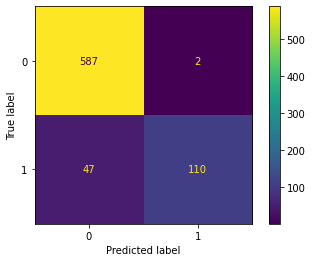

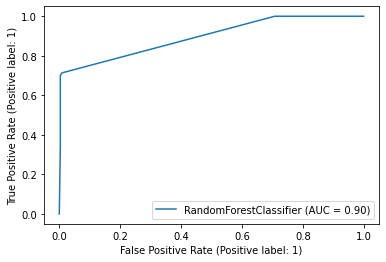

-------------------------------------------------------------------------------------------




d= 5000 
 abs 10 
 abs 10
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9782034346103038
The score for test data is 0.9812332439678284


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9872611464968153
the test recall for the class no is 0.9796264855687606
the training recall for the class yes is 0.9966555183946488
the training recall for the class no is 0.9736625514403292


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9281437125748503
the test precision for the class no is 0.9965457685664939
the training precision for the class yes is 0.9030303030303031
the training precision for the class

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


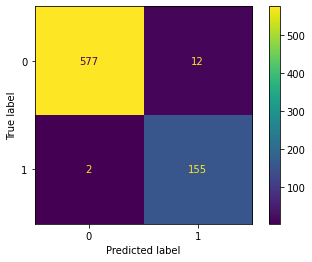

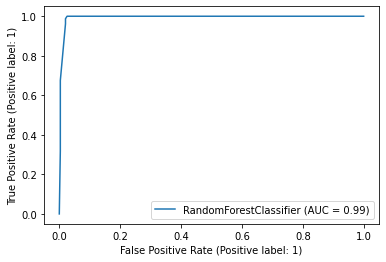

-------------------------------------------------------------------------------------------




d= 1000 
 abs 38 
 abs 38
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9986789960369881
The score for test data is 0.9959785522788204


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9936305732484076
the test recall for the class no is 0.9966044142614601
the training recall for the class yes is 0.9966555183946488
the training recall for the class no is 0.9991769547325103


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9873417721518988
the test precision for the class no is 0.9982993197278912
the training precision for the class yes is 0.9966555183946488
the training precision for the class

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


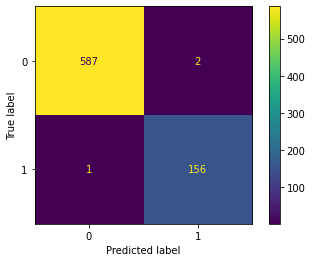

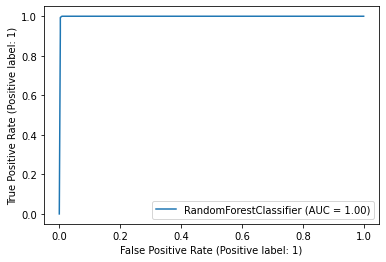

-------------------------------------------------------------------------------------------




d= 500 
 abs 93 
 abs 93
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9986595174262735


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.99830220713073
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9936708860759493
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        1.00 

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


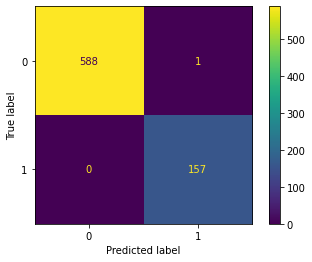

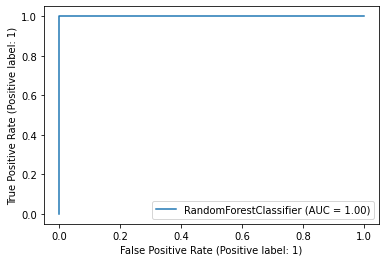

-------------------------------------------------------------------------------------------




d= 100 
 abs 890 
 abs 890
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9973190348525469


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9966044142614601
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9874213836477987
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        1

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


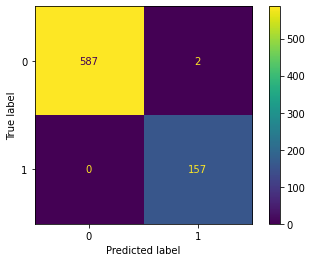

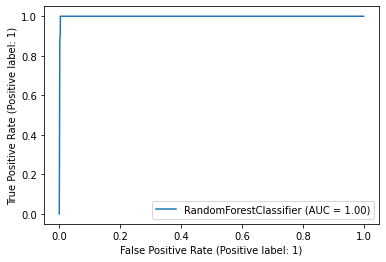

-------------------------------------------------------------------------------------------




d= 50 
 abs 2012 
 abs 2012
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9973190348525469


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9966044142614601
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9874213836477987
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


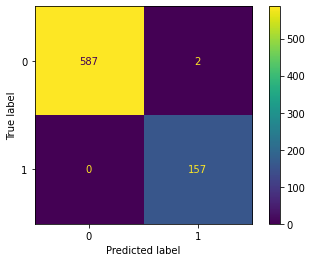

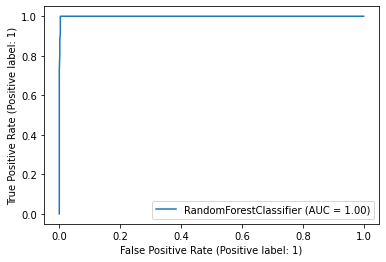

-------------------------------------------------------------------------------------------




d= 10 
 abs 10108 
 abs 10108
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9973190348525469


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9966044142614601
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9874213836477987
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO      

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


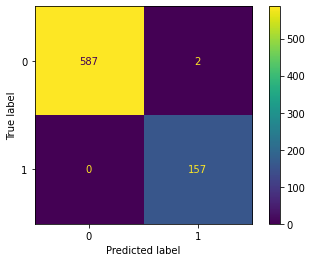

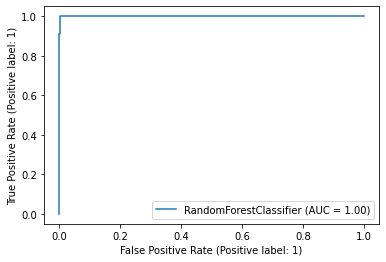

-------------------------------------------------------------------------------------------




d= 5 
 abs 19019 
 abs 19019
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9946380697050938


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9808917197452229
the test recall for the class no is 0.99830220713073
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9935483870967742
the test precision for the class no is 0.9949238578680203
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score  

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


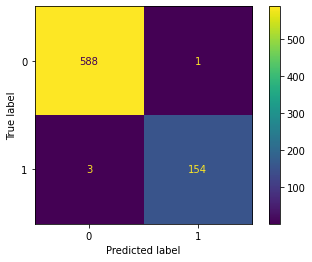

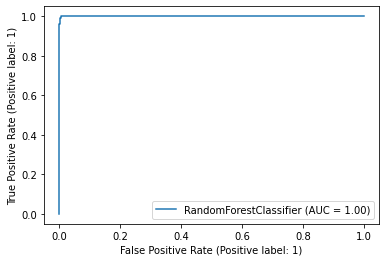

-------------------------------------------------------------------------------------------




d= 1 
 abs 59169 
 abs 59169
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9932975871313673


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9681528662420382
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.9915824915824916
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO       

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


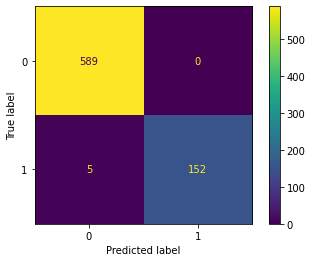

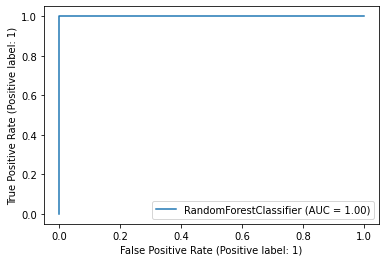

-------------------------------------------------------------------------------------------




d= 0.5 
 abs 83887 
 abs 83887
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9946380697050938


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9745222929936306
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.9932546374367622
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO     

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


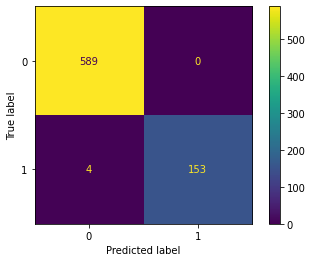

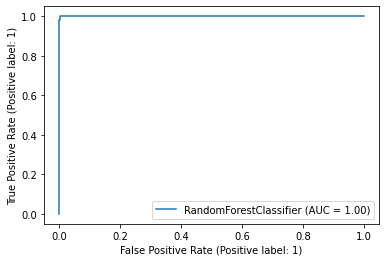

-------------------------------------------------------------------------------------------




d= 0.1 
 abs 160142 
 abs 160142
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9993394980184941
The score for test data is 0.8820375335120644


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.4394904458598726
the test recall for the class no is 1.0
the training recall for the class yes is 0.9966555183946488
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.8700147710487445
the training precision for the class yes is 1.0
the training precision for the class no is 0.9991776315789473



              precision 

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


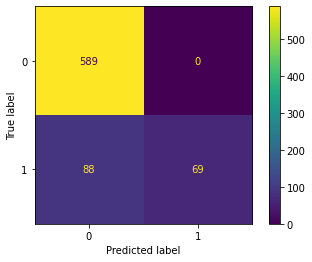

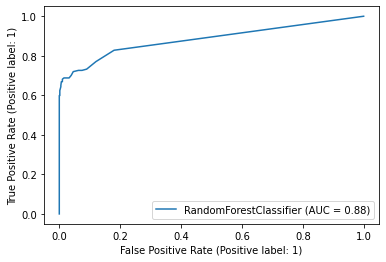

-------------------------------------------------------------------------------------------




d= 0.05 
 abs 195864 
 abs 195864
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9986789960369881
The score for test data is 0.8431635388739946


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.25477707006369427
the test recall for the class no is 1.0
the training recall for the class yes is 0.9933110367892977
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.8342776203966006
the training precision for the class yes is 1.0
the training precision for the class no is 0.9983566146261298



              precisio

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


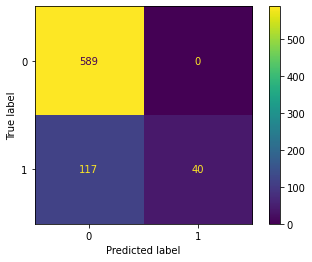

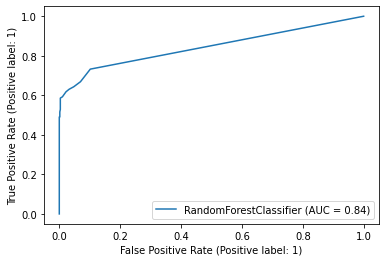

-------------------------------------------------------------------------------------------




d= 0.01 
 abs 246624 
 abs 246624
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9986789960369881
The score for test data is 0.7949061662198391


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.025477707006369428
the test recall for the class no is 1.0
the training recall for the class yes is 0.9933110367892977
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.793800539083558
the training precision for the class yes is 1.0
the training precision for the class no is 0.9983566146261298



              precisio

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


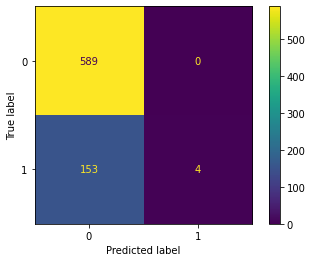

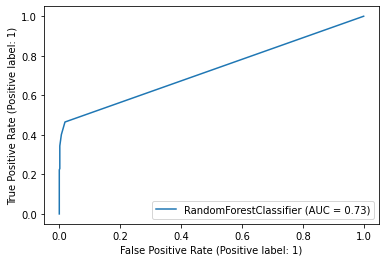

-------------------------------------------------------------------------------------------




d= 0.005 
 abs 256826 
 abs 256826
####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 0.9980184940554822
The score for test data is 0.792225201072386


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.012738853503184714
the test recall for the class no is 1.0
the training recall for the class yes is 0.9899665551839465
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.7916666666666666
the training precision for the class yes is 1.0
the training precision for the class no is 0.9975369458128078



              precisi

c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Student\Desktop\vs_git\.virtualenvs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


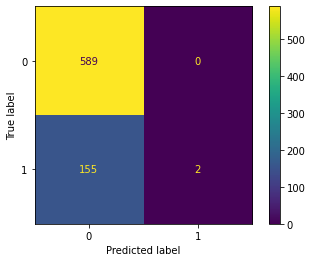

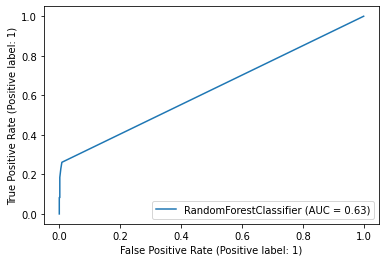

-------------------------------------------------------------------------------------------





: 

In [18]:
# d_set=[100,50,10,5,1,0.5,0.1,0.05,0.01,0.005]
d_set=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005]
report_functional = []
# report_reward = []

Read_from_data = True

final_episodes = local_load_p("Final_episodes_trainand_Test_2062_FIXED2.pickle")


for d in d_set:
  if Read_from_data:
    with open(f'c:/Users/Student/Desktop/Data/Abstraction/Abstraction_data_sampled_200_{d}.pickle', 'rb') as file2:
        unique1 = pickle.load(file2)
    print("\nd=",d,'\n abs',len(unique1),'\n abs',len(set(unique1)))
    uni1 = np.array(unique1)
  if not Read_from_data:
    unique1,uni1 = Abstract_classes(final_episodes,d,model)


  data1_x_b, data1_y_b, data1_y_f_b = ML_first_representation_func_based(d,is_functional_fault,is_reward_fault,model,final_episodes,unique1)

  #########################################################   ML Functional fault  #############
  print("####################################################  functional fault ####################\n\n\n")

  X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(data1_x_b, data1_y_f_b, test_size=0.33, random_state=42)
  RF_FF_1rep = RandomForestClassifier(random_state=0, class_weight='balanced')
  RF_FF_1rep.fit(X_train_f,y_train_f)
  report(RF_FF_1rep,X_train_f,y_train_f,X_test_f,y_test_f)
  report_functional.append(classification_report(y_test_f, RF_FF_1rep.predict(X_test_f), target_names=['NO ','yes'],output_dict=True))

  print("-------------------------------------------------------------------------------------------\n\n\n")
# you can save reports 
with open(f'c:/Users/Student/Desktop/Data/Report/report_ff.pickle', 'wb') as file:
    pickle.dump(report_functional, file)

abstract states: 958
Concrete states 201000
ratio 0.004766169154228856
d= 1 
 abs 958 
 abs 958
size of total data: 1700
Size of training data  1139
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9982174688057041


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9980276134122288
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9818181818181818
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

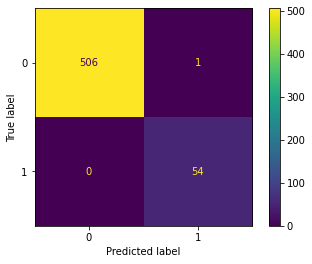

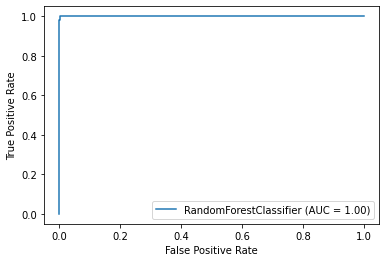

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.966131907308378


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9086538461538461
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 0.9489247311827957
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.95      1.00      0.97       353
         yes       1.00      0.91      0.95       208

    accuracy                       

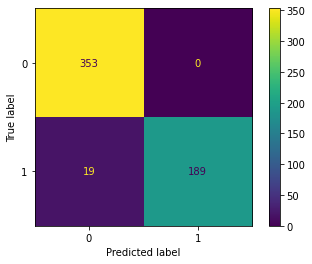

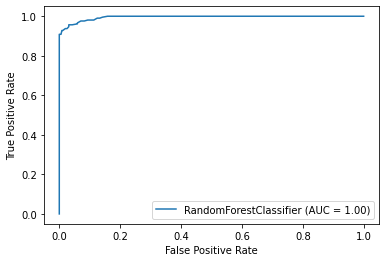

-------------------------------------------------------------------------------------------



abstract states: 909
Concrete states 178169
ratio 0.0051018976365136475
d= 1 
 abs 909 
 abs 909
size of total data: 1500
Size of training data  1005
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.997979797979798


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9978260869565218
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9722222222222222
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the trai

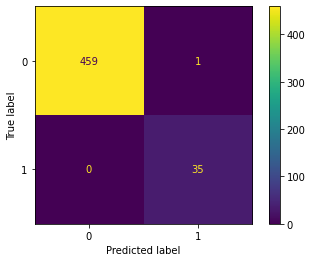

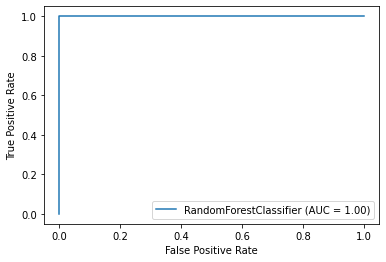

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9717171717171718


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9700598802395209
the test recall for the class no is 0.9725609756097561
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9473684210526315
the test precision for the class no is 0.9845679012345679
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.98      0.97      0.98       328
         yes       0.95      0.97      0.96       167

    

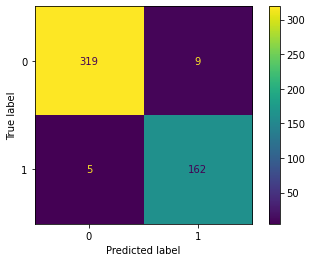

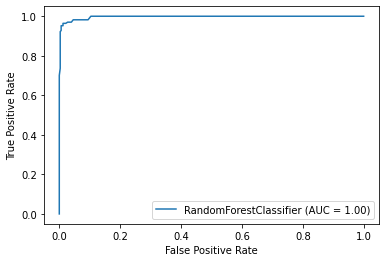

-------------------------------------------------------------------------------------------



abstract states: 854
Concrete states 141487
ratio 0.00603589022313004
d= 1 
 abs 854 
 abs 854
size of total data: 1200
Size of training data  804
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 1.0


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



     

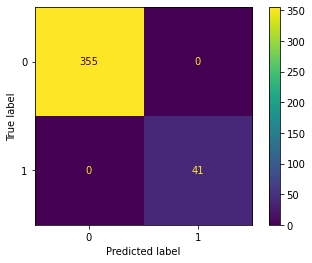

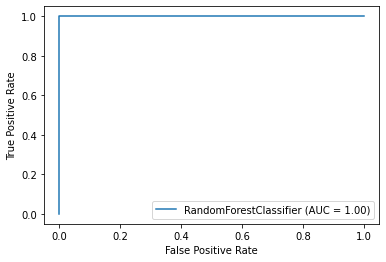

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9671717171717171


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9416666666666667
the test recall for the class no is 0.9782608695652174
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9495798319327731
the test precision for the class no is 0.9747292418772563
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.97      0.98      0.98       276
         yes       0.95      0.94      0.95       120

    

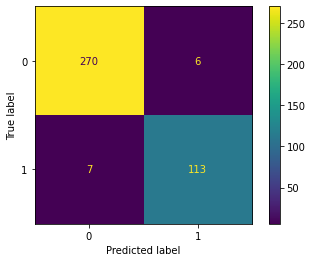

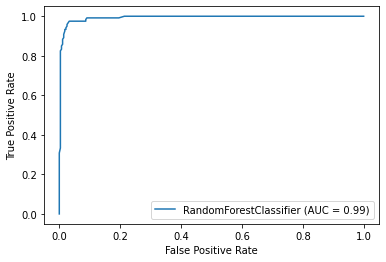

-------------------------------------------------------------------------------------------



abstract states: 751
Concrete states 119097
ratio 0.006305784360647203
d= 1 
 abs 751 
 abs 751
size of total data: 1000
Size of training data  670
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.990909090909091


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9545454545454546
the test recall for the class no is 0.9935064935064936
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9130434782608695
the test precision for the class no is 0.996742671009772
the training precision for th

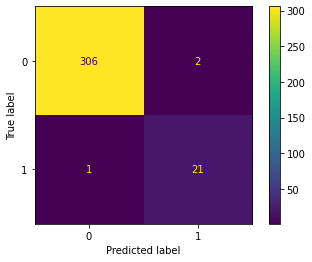

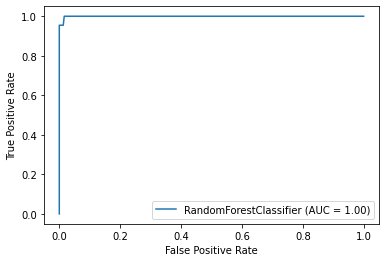

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9545454545454546


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9323308270676691
the test recall for the class no is 0.9695431472081218
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9538461538461539
the test precision for the class no is 0.955
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.95      0.97      0.96       197
         yes       0.95      0.93      0.94       133

    accuracy     

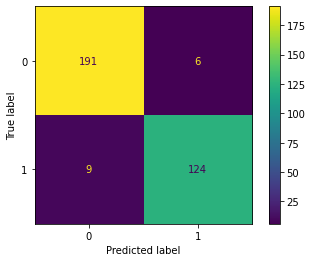

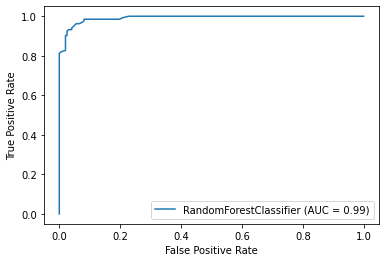

-------------------------------------------------------------------------------------------



abstract states: 772
Concrete states 106027
ratio 0.00728116423175229
d= 1 
 abs 772 
 abs 772
size of total data: 900
Size of training data  603
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9932659932659933


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9926470588235294
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9259259259259259
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the trainin

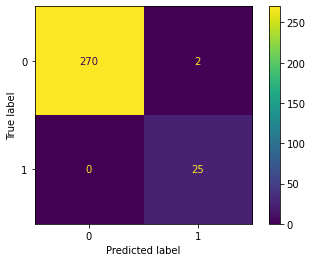

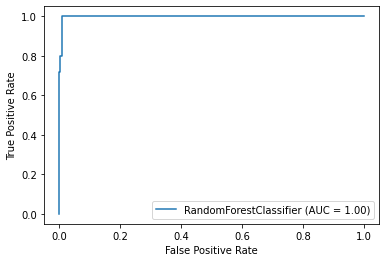

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9629629629629629


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9230769230769231
the test recall for the class no is 0.9844559585492227
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9696969696969697
the test precision for the class no is 0.9595959595959596
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.96      0.98      0.97       193
         yes       0.97      0.92      0.95       104

    

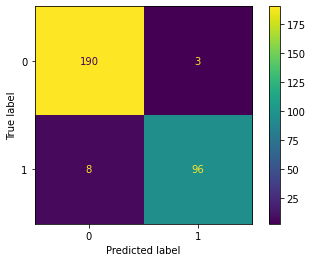

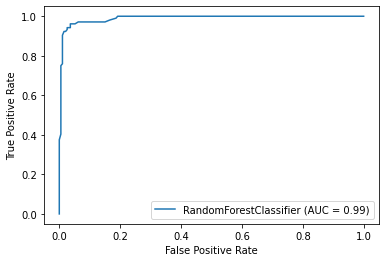

-------------------------------------------------------------------------------------------



abstract states: 733
Concrete states 95577
ratio 0.007669209119348797
d= 1 
 abs 733 
 abs 733
size of total data: 800
Size of training data  536
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 1.0


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



      

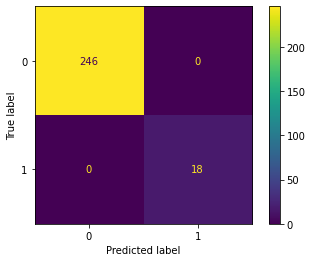

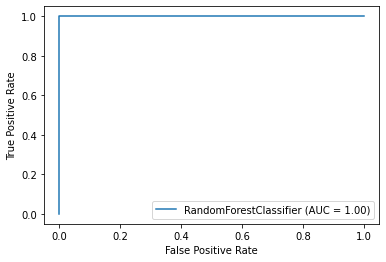

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.946969696969697


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9423076923076923
the test recall for the class no is 0.95
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9245283018867925
the test precision for the class no is 0.9620253164556962
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.96      0.95      0.96       160
         yes       0.92      0.94      0.93       104

    accuracy       

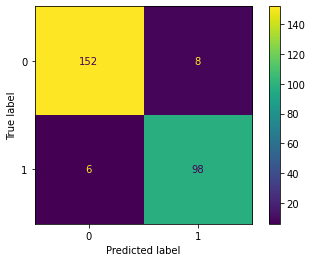

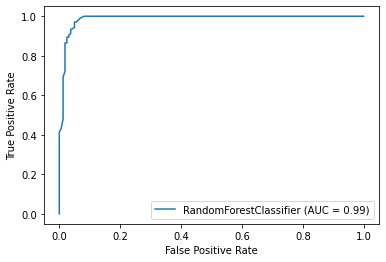

-------------------------------------------------------------------------------------------



abstract states: 709
Concrete states 82377
ratio 0.008606771307525159
d= 1 
 abs 709 
 abs 709
size of total data: 700
Size of training data  469
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 1.0


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 1.0
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



      

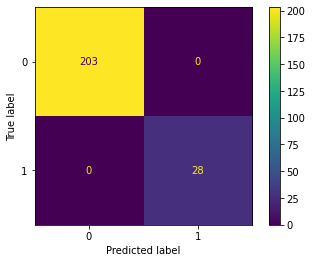

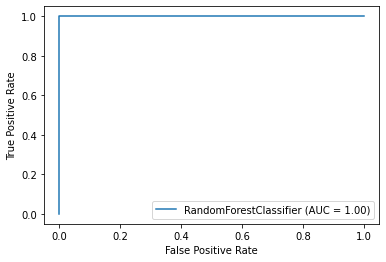

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9567099567099567


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9722222222222222
the test recall for the class no is 0.949685534591195
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.8974358974358975
the test precision for the class no is 0.9869281045751634
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.99      0.95      0.97       159
         yes       0.90      0.97      0.93        72

    a

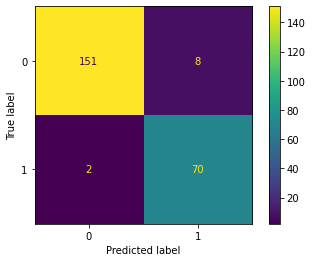

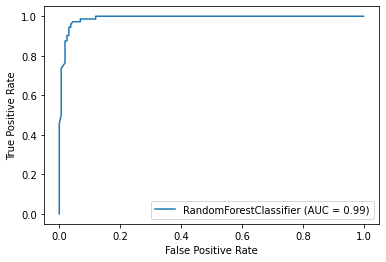

-------------------------------------------------------------------------------------------



abstract states: 640
Concrete states 58482
ratio 0.01094353818268869
d= 1 
 abs 640 
 abs 640
size of total data: 500
Size of training data  335
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9878787878787879


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9863945578231292
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9
the test precision for the class no is 1.0
the training precision for the class yes is 1.0
the training precision for 

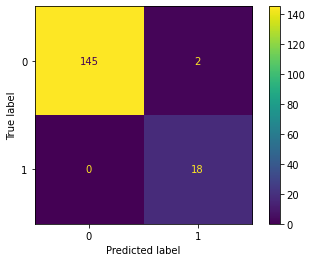

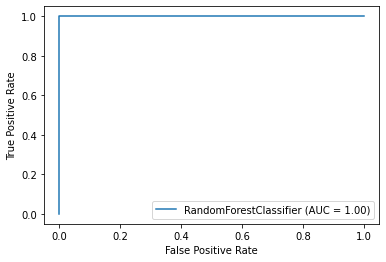

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9272727272727272


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9180327868852459
the test recall for the class no is 0.9326923076923077
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.8888888888888888
the test precision for the class no is 0.9509803921568627
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.95      0.93      0.94       104
         yes       0.89      0.92      0.90        61

    

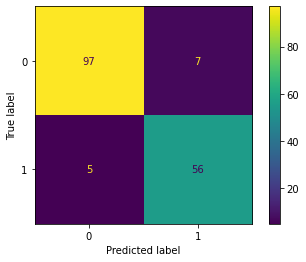

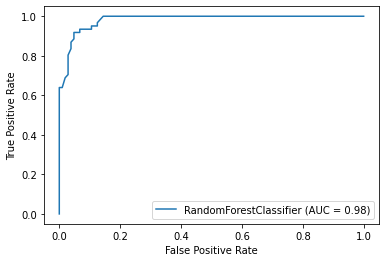

-------------------------------------------------------------------------------------------



time: 20min 25s (started: 2022-03-30 19:21:26 +00:00)


In [ ]:
# d_set=[100,50,10,5,1,0.5,0.1,0.05,0.01,0.005]
d_set=[1]
report_functional = []
report_reward = []

for d in d_set:
  for total_data_size in [1700,1500,1200,1000 ,900, 800,700,500]:
    idx = np.random.choice(len(ep), size=total_data_size, replace=False)
    sub_ep = [ep[n] for n in idx]
    unique1,uni1 = Abstract_classes(sub_ep,d,model)
    print("d=",d,'\n abs',len(unique1),'\n abs',len(set(unique1)))
    uni1 = np.array(unique1)
    data1_x_b, data1_y_b, data1_y_f_b = ML_first_representation(d,0.05,uni1,model,sub_ep,unique1)
    print("size of total data:",len(data1_x_b))
    X_train_reward_fault, X_test_reward_fault, y_train_reward_fault, y_test_reward_fault = train_test_split(data1_x_b, data1_y_b, test_size=0.33, random_state=42)
    print("Size of training data ", len(X_train_reward_fault))

    
    print("####################################################  Reward fault ####################\n\n\n")

    RF_RF_1rep = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_RF_1rep.fit(X_train_reward_fault,y_train_reward_fault)
    report(RF_RF_1rep,X_train_reward_fault,y_train_reward_fault,X_test_reward_fault,y_test_reward_fault)
    report_reward.append(classification_report(y_test_reward_fault, RF_RF_1rep.predict(X_test_reward_fault), target_names=['NO ','yes'],output_dict=True))
    
    print("####################################################  functional fault ####################\n\n\n")

    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(data1_x_b, data1_y_f_b, test_size=0.33, random_state=42)
    RF_FF_1rep = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_FF_1rep.fit(X_train_f,y_train_f)
    report(RF_FF_1rep,X_train_f,y_train_f,X_test_f,y_test_f)
    report_functional.append(classification_report(y_test_f, RF_FF_1rep.predict(X_test_f), target_names=['NO ','yes'],output_dict=True))

    print("-------------------------------------------------------------------------------------------\n\n\n")

# with open(f'/content/drive/MyDrive/GM/report_rf.pickle', 'wb') as file:
#     pickle.dump(report_reward, file)
# with open(f'/content/drive/MyDrive/GM/report_ff.pickle', 'wb') as file:
#     pickle.dump(report_functional, file)

In [ ]:
with open(f'/content/drive/MyDrive/Data/Report/report_ff.pickle', 'rb') as file2:
    report_ff = pickle.load(file2)

time: 362 ms (started: 2022-05-12 15:09:03 +00:00)


In [ ]:
report_ff

[{'NO ': {'f1-score': 0.8364389233954452,
   'precision': 0.7622641509433963,
   'recall': 0.926605504587156,
   'support': 436},
  'accuracy': 0.7733142037302726,
  'macro avg': {'f1-score': 0.7336400224453861,
   'precision': 0.7853236922381652,
   'recall': 0.7219234419487504,
   'support': 697},
  'weighted avg': {'f1-score': 0.7594503634299776,
   'precision': 0.779533993921688,
   'recall': 0.7733142037302726,
   'support': 697},
  'yes': {'f1-score': 0.630841121495327,
   'precision': 0.8083832335329342,
   'recall': 0.5172413793103449,
   'support': 261}},
 {'NO ': {'f1-score': 0.8376421923474664,
   'precision': 0.7627118644067796,
   'recall': 0.9288990825688074,
   'support': 436},
  'accuracy': 0.7747489239598279,
  'macro avg': {'f1-score': 0.7349803467592133,
   'precision': 0.7879824382274863,
   'recall': 0.7230702309395761,
   'support': 697},
  'weighted avg': {'f1-score': 0.7607562764262782,
   'precision': 0.7816376026197047,
   'recall': 0.7747489239598279,
   'sup

time: 5.54 ms (started: 2022-05-12 15:09:29 +00:00)


abstract states: 951
Concrete states 201312
ratio 0.004724010491177873
d= 1 
 abs 951 
 abs 951
size of total data: 1700
Size of training data  1139
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9946524064171123


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.98
the test recall for the class no is 0.9960861056751468
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9607843137254902
the test precision for the class no is 0.9980392156862745
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


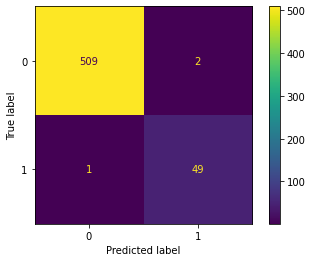

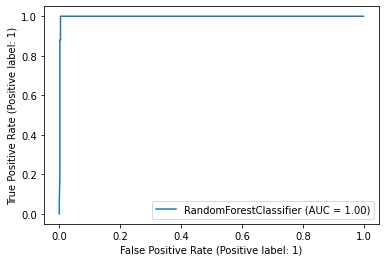

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9554367201426025


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.8926553672316384
the test recall for the class no is 0.984375
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9634146341463414
the test precision for the class no is 0.9521410579345088
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.95      0.98      0.97       384
         yes       0.96      0.89      0.93       177

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


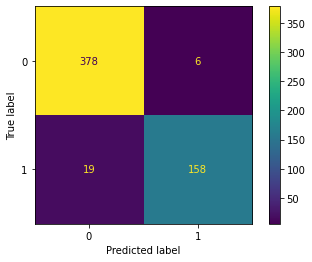

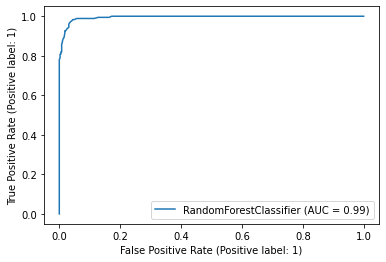

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 894
Concrete states 177547
ratio 0.0050352864311985
d= 1 
 abs 894 
 abs 894
size of total data: 1500
Size of training data  1005
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9939393939393939


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9772727272727273
the test recall for the class no is 0.9955654101995566
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


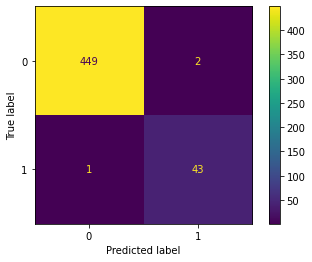

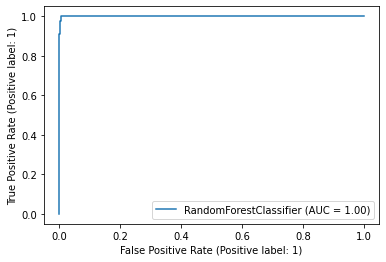

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9676767676767677


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9585798816568047
the test recall for the class no is 0.9723926380368099
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9473684210526315
the test precision for the class no is 0.9783950617283951
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.98      0.97      0.98       326
         yes       0.95      0.96      0.95       169

    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


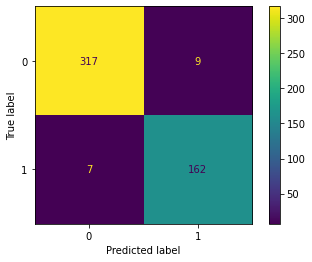

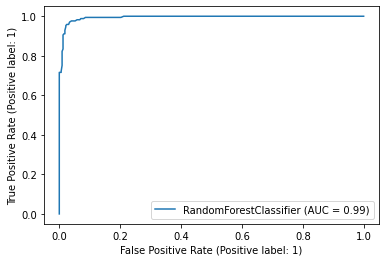

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 834
Concrete states 141761
ratio 0.005883141343528897
d= 1 
 abs 834 
 abs 834
size of total data: 1200
Size of training data  804
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.98989898989899


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9888579387186629
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision--------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


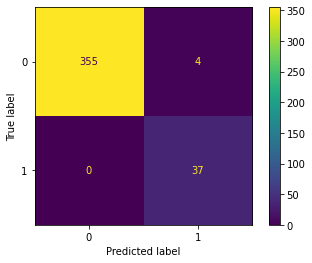

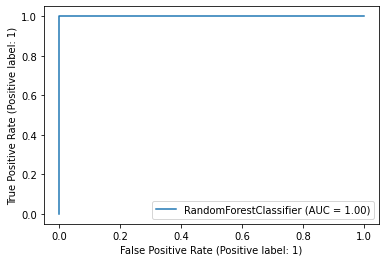

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.952020202020202


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9126984126984127
the test recall for the class no is 0.9703703703703703
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9349593495934959
the test precision for the class no is 0.9597069597069597
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.96      0.97      0.97       270
         yes       0.93      0.91      0.92       126

    a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


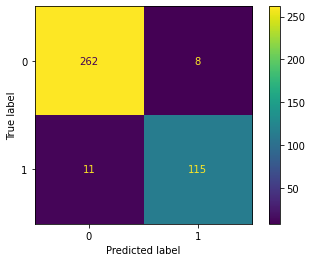

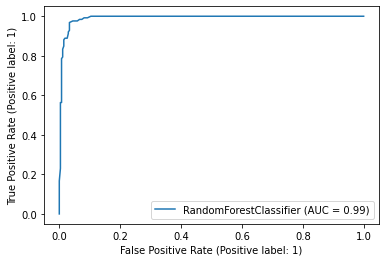

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 759
Concrete states 118571
ratio 0.006401227956245625
d= 1 
 abs 759 
 abs 759
size of total data: 1000
Size of training data  670
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9939393939393939


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9666666666666667
the test recall for the class no is 0.9966666666666667
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


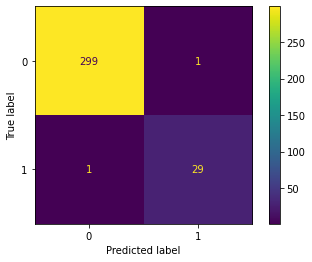

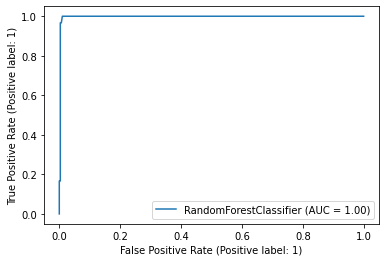

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9636363636363636


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9344262295081968
the test recall for the class no is 0.9807692307692307
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9661016949152542
the test precision for the class no is 0.9622641509433962
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.96      0.98      0.97       208
         yes       0.97      0.93      0.95       122

    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


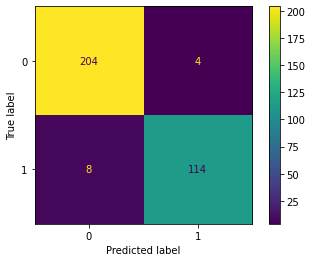

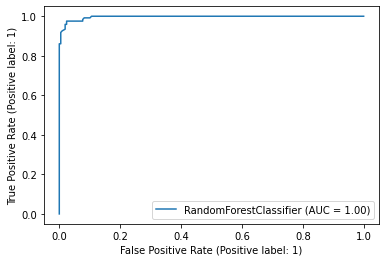

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 732
Concrete states 106369
ratio 0.0068817042559392305
d= 1 
 abs 732 
 abs 732
size of total data: 900
Size of training data  603
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9932659932659933


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.9928057553956835
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


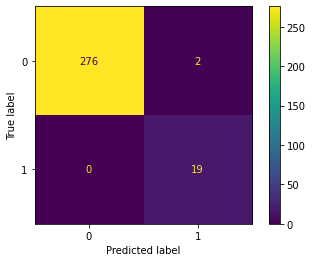

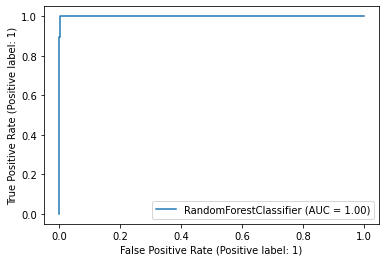

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9562289562289562


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9380530973451328
the test recall for the class no is 0.967391304347826
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9464285714285714
the test precision for the class no is 0.9621621621621622
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.96      0.97      0.96       184
         yes       0.95      0.94      0.94       113

    a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


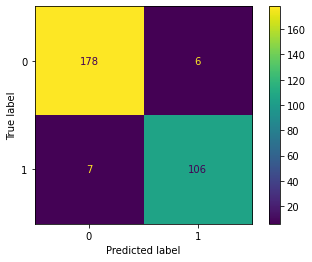

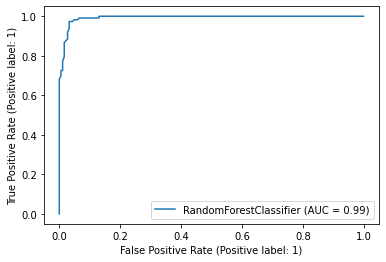

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 673
Concrete states 95370
ratio 0.007056726433889064
d= 1 
 abs 673 
 abs 673
size of total data: 800
Size of training data  536
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9696969696969697


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 0.967741935483871
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision---------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


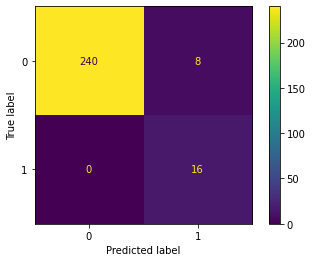

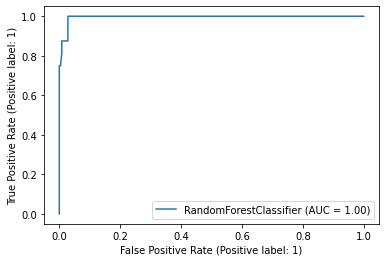

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9393939393939394


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.8695652173913043
the test recall for the class no is 0.9767441860465116
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9523809523809523
the test precision for the class no is 0.9333333333333333
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.93      0.98      0.95       172
         yes       0.95      0.87      0.91        92

    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


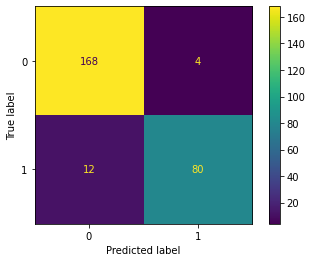

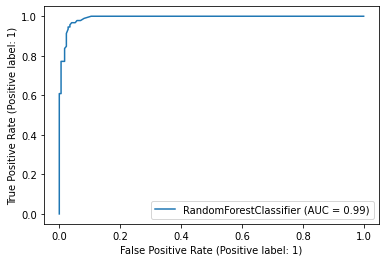

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 683
Concrete states 83375
ratio 0.008191904047976012
d= 1 
 abs 683 
 abs 683
size of total data: 700
Size of training data  469
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 1.0


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the tes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


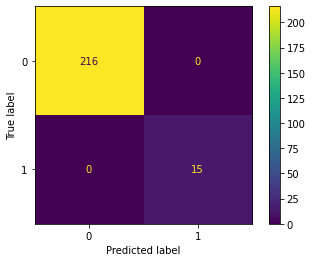

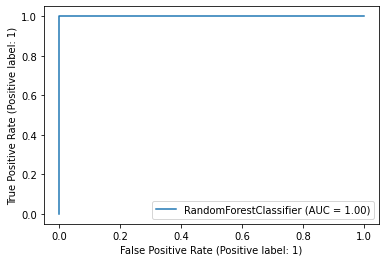

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9567099567099567


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9411764705882353
the test recall for the class no is 0.9657534246575342
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9411764705882353
the test precision for the class no is 0.9657534246575342
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.97      0.97      0.97       146
         yes       0.94      0.94      0.94        85

    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


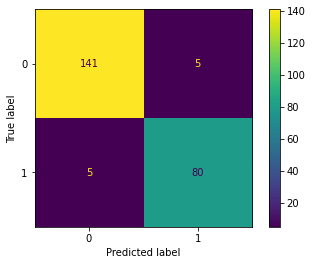

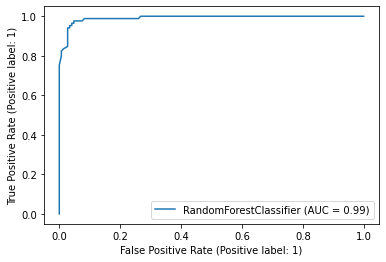

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



abstract states: 610
Concrete states 59014
ratio 0.010336530314840546
d= 1 
 abs 610 
 abs 610
size of total data: 500
Size of training data  335
####################################################  Reward fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 1.0


--------------------------------------recall---------------------------------
the test recall for the class yes is 1.0
the test recall for the class no is 1.0
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the tes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


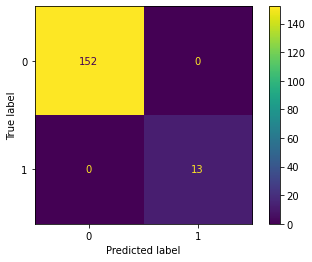

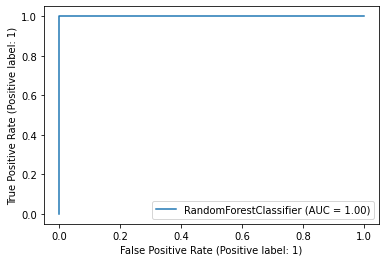

####################################################  functional fault ####################



********************** reporting the result of the model **************************
The score for train data is 1.0
The score for test data is 0.9272727272727272


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9016393442622951
the test recall for the class no is 0.9423076923076923
the training recall for the class yes is 1.0
the training recall for the class no is 1.0


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9016393442622951
the test precision for the class no is 0.9423076923076923
the training precision for the class yes is 1.0
the training precision for the class no is 1.0



              precision    recall  f1-score   support

         NO        0.94      0.94      0.94       104
         yes       0.90      0.90      0.90        61

    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


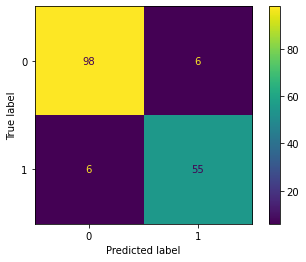

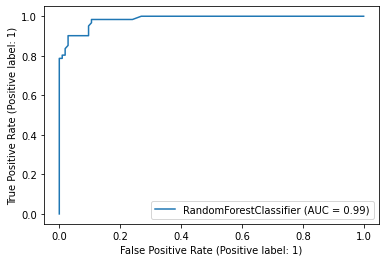

-------------------------------------------------------------------------------------------
###########################################################################################
-------------------------------------------------------------------------------------------



time: 17min 38s (started: 2022-05-12 15:19:23 +00:00)


In [ ]:
# d_set=[100,50,10,5,1,0.5,0.1,0.05,0.01,0.005]
d_set=[1]


report_functional = []
report_reward = []

for d in d_set:
  for total_data_size in [1700,1500,1200,1000 ,900, 800,700,500]:
    idx = np.random.choice(len(ep), size=total_data_size, replace=False)
    sub_ep = [ep[n] for n in idx]
    unique1,uni1 = Abstract_classes(sub_ep,d,model)
    print("d=",d,'\n abs',len(unique1),'\n abs',len(set(unique1)))
    uni1 = np.array(unique1)
    data1_x_b, data1_y_b, data1_y_f_b = ML_first_representation(d,0.05,uni1,model,sub_ep,unique1)
    print("size of total data:",len(data1_x_b))
    X_train_reward_fault, X_test_reward_fault, y_train_reward_fault, y_test_reward_fault = train_test_split(data1_x_b, data1_y_b, test_size=0.33, random_state=42)
    print("Size of training data ", len(X_train_reward_fault))

    
    print("####################################################  Reward fault ####################\n\n\n")

    RF_RF_1rep = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_RF_1rep.fit(X_train_reward_fault,y_train_reward_fault)
    report(RF_RF_1rep,X_train_reward_fault,y_train_reward_fault,X_test_reward_fault,y_test_reward_fault)
    report_reward.append(classification_report(y_test_reward_fault, RF_RF_1rep.predict(X_test_reward_fault), target_names=['NO ','yes'],output_dict=True))
    
    #########################################################   ML #############
    print("####################################################  functional fault ####################\n\n\n")

    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(data1_x_b, data1_y_f_b, test_size=0.33, random_state=42)
    RF_FF_1rep = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_FF_1rep.fit(X_train_f,y_train_f)
    report(RF_FF_1rep,X_train_f,y_train_f,X_test_f,y_test_f)
    report_functional.append([classification_report(y_test_f, RF_FF_1rep.predict(X_test_f), target_names=['NO ','yes'],output_dict=True)])
    print("-------------------------------------------------------------------------------------------")
    print("###########################################################################################")
    print("-------------------------------------------------------------------------------------------\n\n\n")
with open(f'/content/drive/MyDrive/Data/Report/report_rf_final_size_of_data.pickle', 'wb') as file:  #save reports 
    pickle.dump(report_reward, file)
with open(f'/content/drive/MyDrive/Data/Report/report_ff_final_size_of_data.pickle', 'wb') as file:
    pickle.dump(report_functional, file)